# Projeto 3
### Teoria dos Grafos (PPGCC - UNIFESP 2021.2)
Autor: Gaspar Andrade  
Implementação da versão simples do algoritmo Ford Fulkerson (apresentado em aula).

![](./figure_fordfulkerson_algo.png)<br /> <br />


![](./figure_incrementafluxo_algo.png)

In [33]:
import networkx as nx           # Graph implementation
import matplotlib.pyplot as plt # Graph Plot

In [367]:
# Verifica se ha um caminho entre os nohs s e t, i.e., nohs que nao foram visitados
def bfs_verify_path(g: nx.Graph, s, t, visited_arg) -> bool:
  q = []
  visited = visited_arg.copy()
  visited.append(s)
  q.append(s)

  while q:
    tmp = q.pop(0)
    for neighbour in g.neighbors(tmp):
      if neighbour not in visited:
        visited.append(neighbour)
        q.append(neighbour)
    if tmp == t:
      return True

  return False

# Breadth first-search modificado
# Busca um caminho de aumento entre s e t em Gx = (V, Ax')
def bfs(g_arg: nx.Graph, s, t) -> []:
  g = g_arg.copy()
  visited = []
  q = []
  visited.append(s)
  q.append(s)

  ret = []
  while q:
    tmp = q.pop(0)
    if tmp == None:
      break
    tmp_max_node = None
    tmp_max_node_value = 0
    ret.append(tmp)
    for neighbour in g.neighbors(tmp):
      if neighbour not in visited:
        if bfs_verify_path(g, neighbour, t, visited): # if there is a path between current node and t
          dif = g.adj[tmp][neighbour]['c'] - g.adj[tmp][neighbour]['f']
          if dif > tmp_max_node_value:
            tmp_max_node = neighbour
            tmp_max_node_value = dif
    q.append(tmp_max_node)
    visited.append(tmp_max_node) 
    if tmp == t:
      return ret
  return []

# Algorithm 3: Incrementa-Fluxo
def incrementa_fluxo(G: nx.Graph, P: []) -> int:
  delta = 0 # delta := min{uij - x'ij, tal que (i, j) eh arco de P}
  for i in range (1, len(P)):
    temp = G.adj[P[i-1]][P[i]]["c"] - G.adj[P[i-1]][P[i]]["f"]
    if delta == 0 or temp < delta:
      delta = temp

  print("\tdelta:", delta, end="\n\n")

  for i in range (1, len(P)):
    G.adj[P[i-1]][P[i]]["f"] = G.adj[P[i-1]][P[i]]["f"] + delta
    G.adj[P[i]][P[i-1]]["f"] = G.adj[P[i]][P[i-1]]["f"] - delta

  return delta

# Retorna os vertices que são alcancaveis a partir do nó inicial (s)
def get_corte_minimo(g: nx.Graph, s) -> []:
  visited = []
  q = []
  visited.append(s)
  q.append(s)
  ret = []
  while q:
    tmp = q.pop(0)
    ret.append(tmp)
    if tmp == None:
      break
    for neighbour in g.neighbors(tmp):
      if neighbour not in visited:
        if g.adj[tmp][neighbour]['c'] - g.adj[tmp][neighbour]['f'] > 0:
          q.append(neighbour)
          visited.append(neighbour)
          
  return ret


# G = (V, E) with flow capacity c; source node 's'; sink node 't'
def ford_fulkerson_algo(G: nx.Graph, s, t) -> (int, nx.Graph):
  temp = nx.DiGraph()
  temp.add_edges_from(G.edges())

  # set flow values to 0
  for i, j in temp.edges:
    G.adj[i][j]["f"] = 0
    G.add_edge(j, i, c=G.adj[i][j]["c"], f=G.adj[i][j]["c"])

  fluxo_total = 0
  count = 1
  while True:
    print(count, "a iteracao", sep='')
    G_residual = nx.DiGraph()
    for i, j in G.edges:
      if G.adj[i][j]["f"] < G.adj[i][j]["c"]:
        G_residual.add_edge(i, j, c=G.adj[i][j]["c"], f=G.adj[i][j]["f"])
    #print(G_residual.edges(data=True))
    print("Grafo residual")
    plot_graph(G_residual, 's', 't', None)
    # P = bfs Busca um caminho de aumento entre s e t em Gx = (V, Ax')
    P = []
    if not nx.is_empty(G_residual):
      P = bfs(G_residual, s, t)
      if P:
        print("\ncaminho de aumento:", list(P))
        plot_graph(G_residual, 's', 't', list(P))

    if P: # if P existe then
      fluxo_total += incrementa_fluxo(G, P)
    else: # until nao exista caminho P
      break
    count = count + 1
    print("\n\n")

  # Corte minimo T. Conjunto de nos acessiveis a partir de s no grafo residual de fluxo maximo.
  T = get_corte_minimo(G_residual, s)

  return fluxo_total, T
  

In [361]:
def plot_graph(g: nx.Graph, s, t, caminho_de_aumento) -> None:
    g_copy = g.copy()
    pos = nx.spring_layout(g, scale=5)
    
    # nodes
    color_map = ['orange' if node == s or node == t else 'steelblue' for node in G]
    nx.draw_networkx_nodes(g, pos, node_size=250, node_color=color_map)
    
    for i, j in g.edges:
      g_copy.adj[i][j]['color'] = 'black'
    if caminho_de_aumento:
      for i in range(1, len(caminho_de_aumento)):
        g_copy.adj[caminho_de_aumento[i-1]][caminho_de_aumento[i]]['color'] = 'r'
      edge_colors = nx.get_edge_attributes(g_copy, 'color').values()
      nx.draw_networkx_edges(g, pos, width=2, arrowsize=10, edge_color=edge_colors, connectionstyle="arc3, rad=0.1")
    else:
      nx.draw_networkx_edges(g, pos, width=2, arrowsize=10, connectionstyle="arc3, rad=0.1")
    
    # labels
    labels = nx.get_edge_attributes(g, 'c')
    labels2 = nx.get_edge_attributes(g, 'f')
    l = []
    l.append(labels)
    l.append(labels2)
    edge_labels = {}
    for u, v, data in g.edges(data=True):
      edge_labels[u, v] = data
    
    nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, font_size=14, label_pos=0.3)
    
    plt.rcParams['figure.figsize'] = [25, 20]
    plt.figure(3, figsize=(25,20), dpi=60)
    plt.show()

## Exemplo 1 (Apresentado em aula e no Video: Ford-Fulkerson in 5 minutes - Step by step example)



1a iteracao
Grafo residual


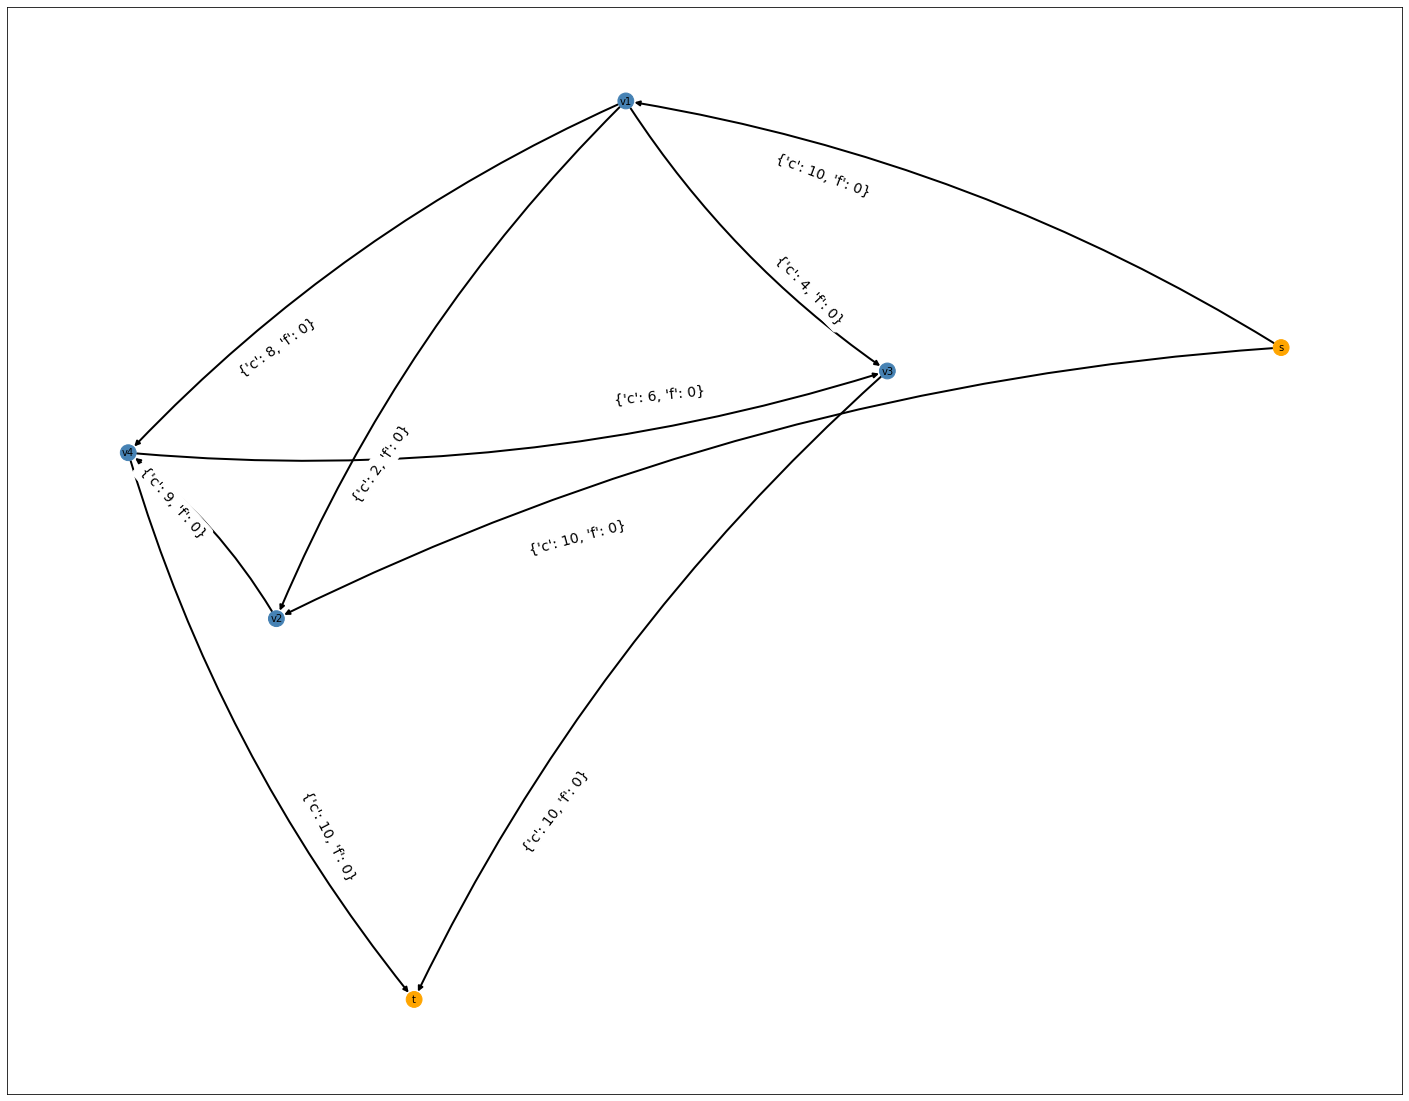

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', 'v1', 'v4', 't']


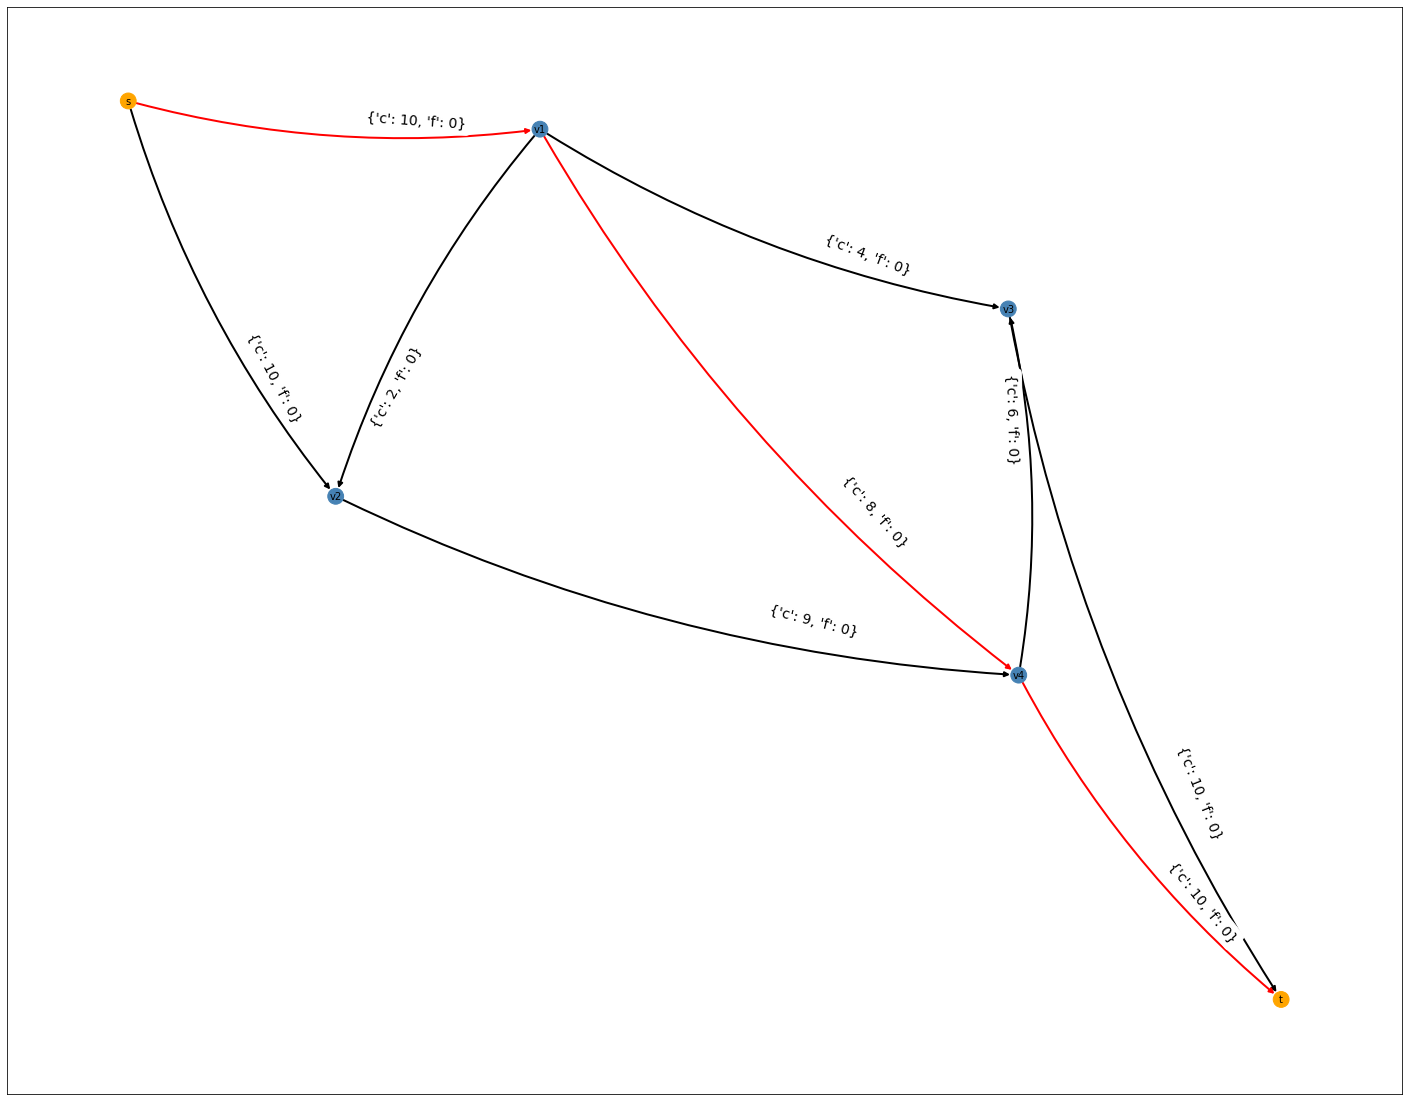

<Figure size 1500x1200 with 0 Axes>

	delta: 8




2a iteracao
Grafo residual


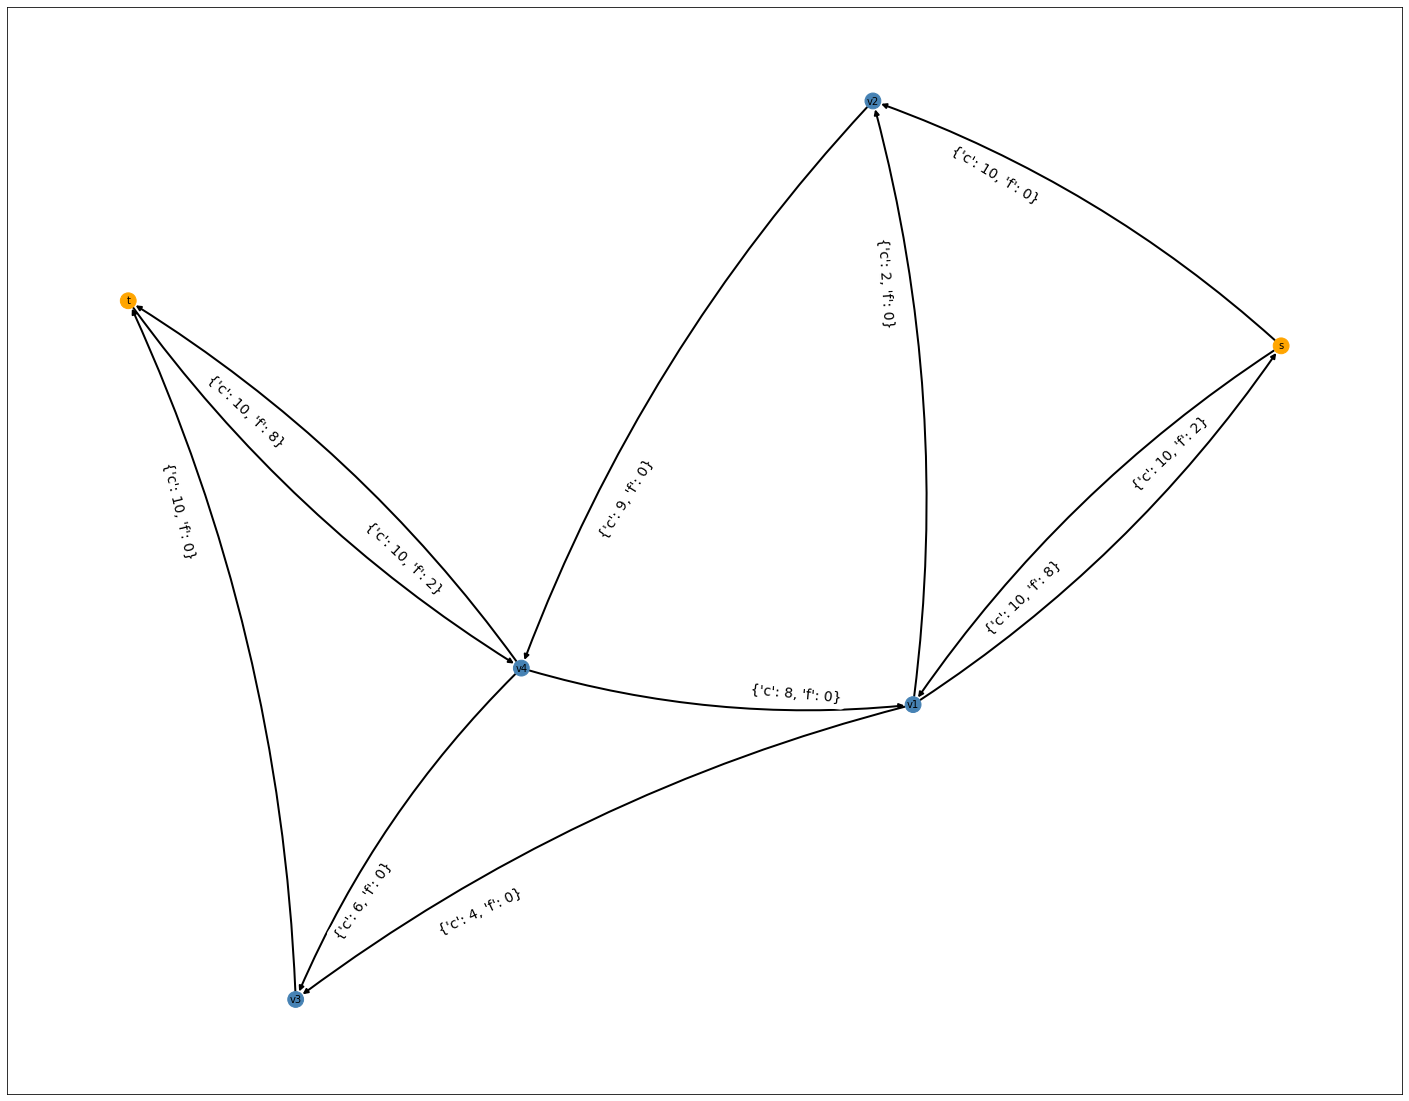

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', 'v2', 'v4', 'v1', 'v3', 't']


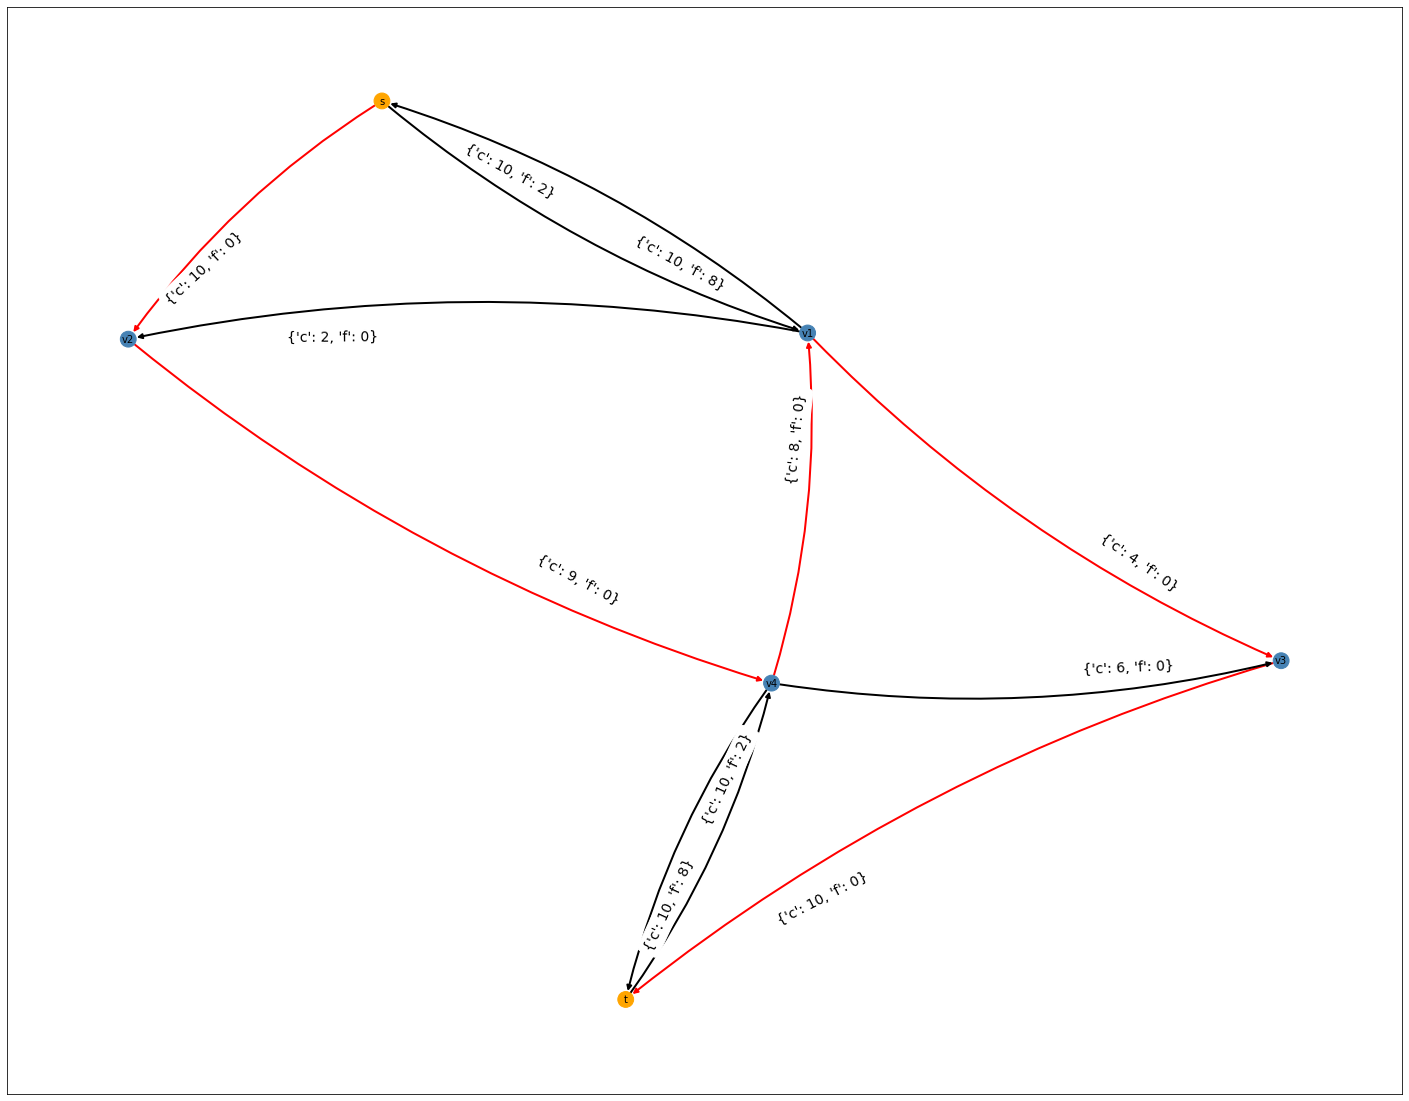

<Figure size 1500x1200 with 0 Axes>

	delta: 4




3a iteracao
Grafo residual


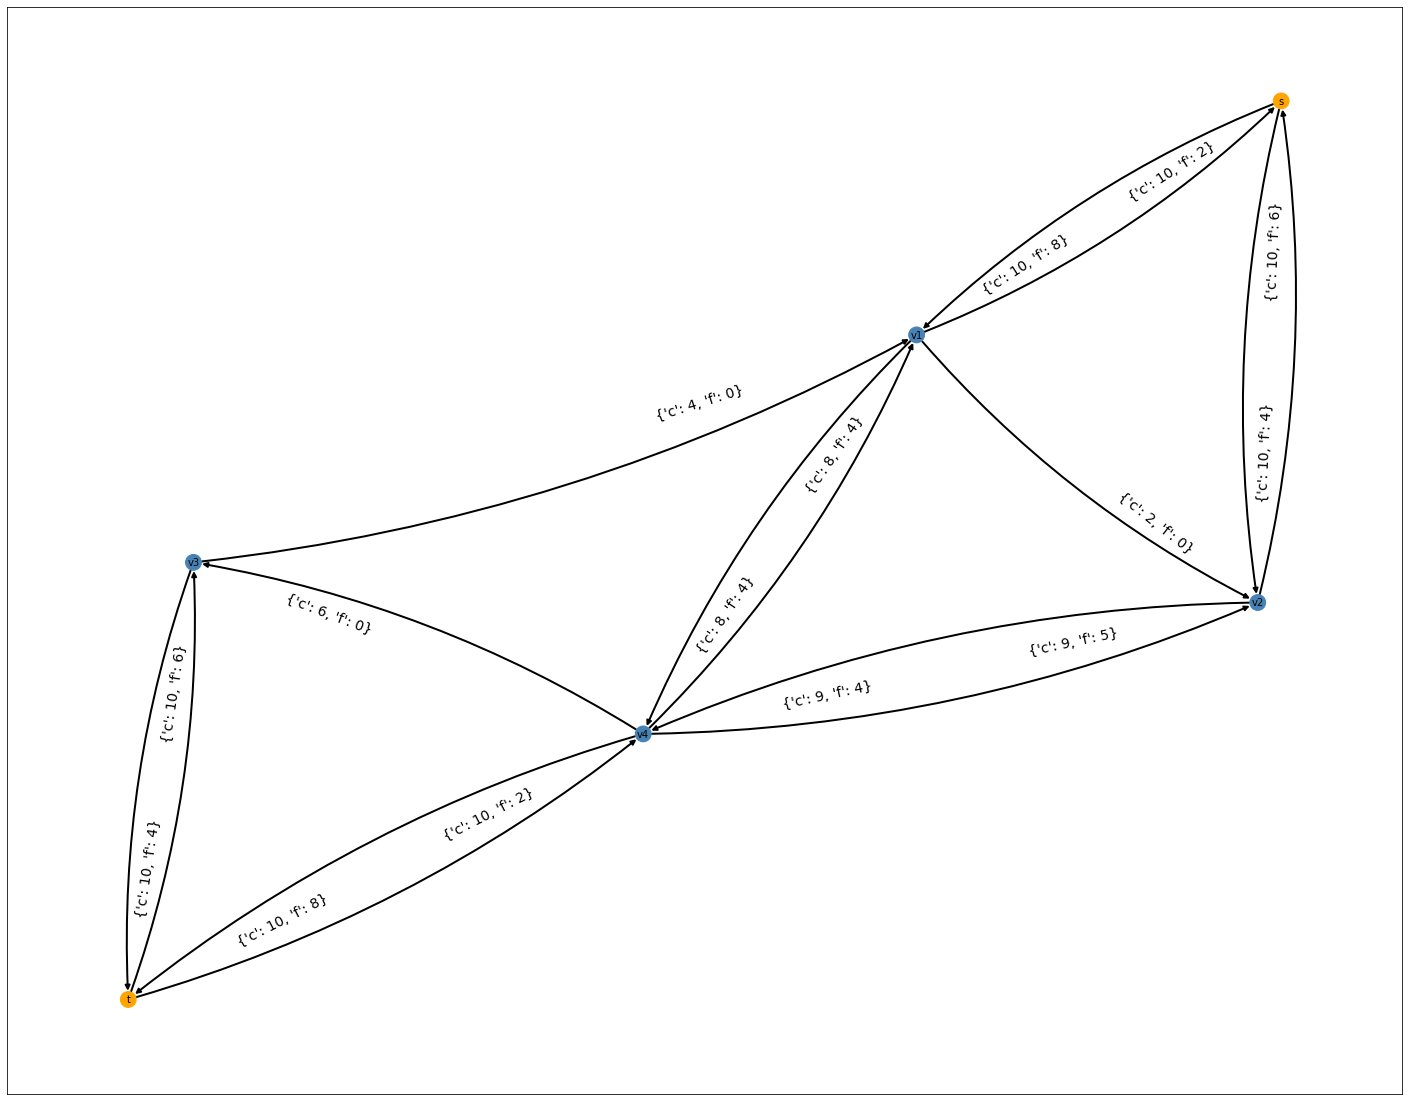

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', 'v2', 'v4', 'v3', 't']


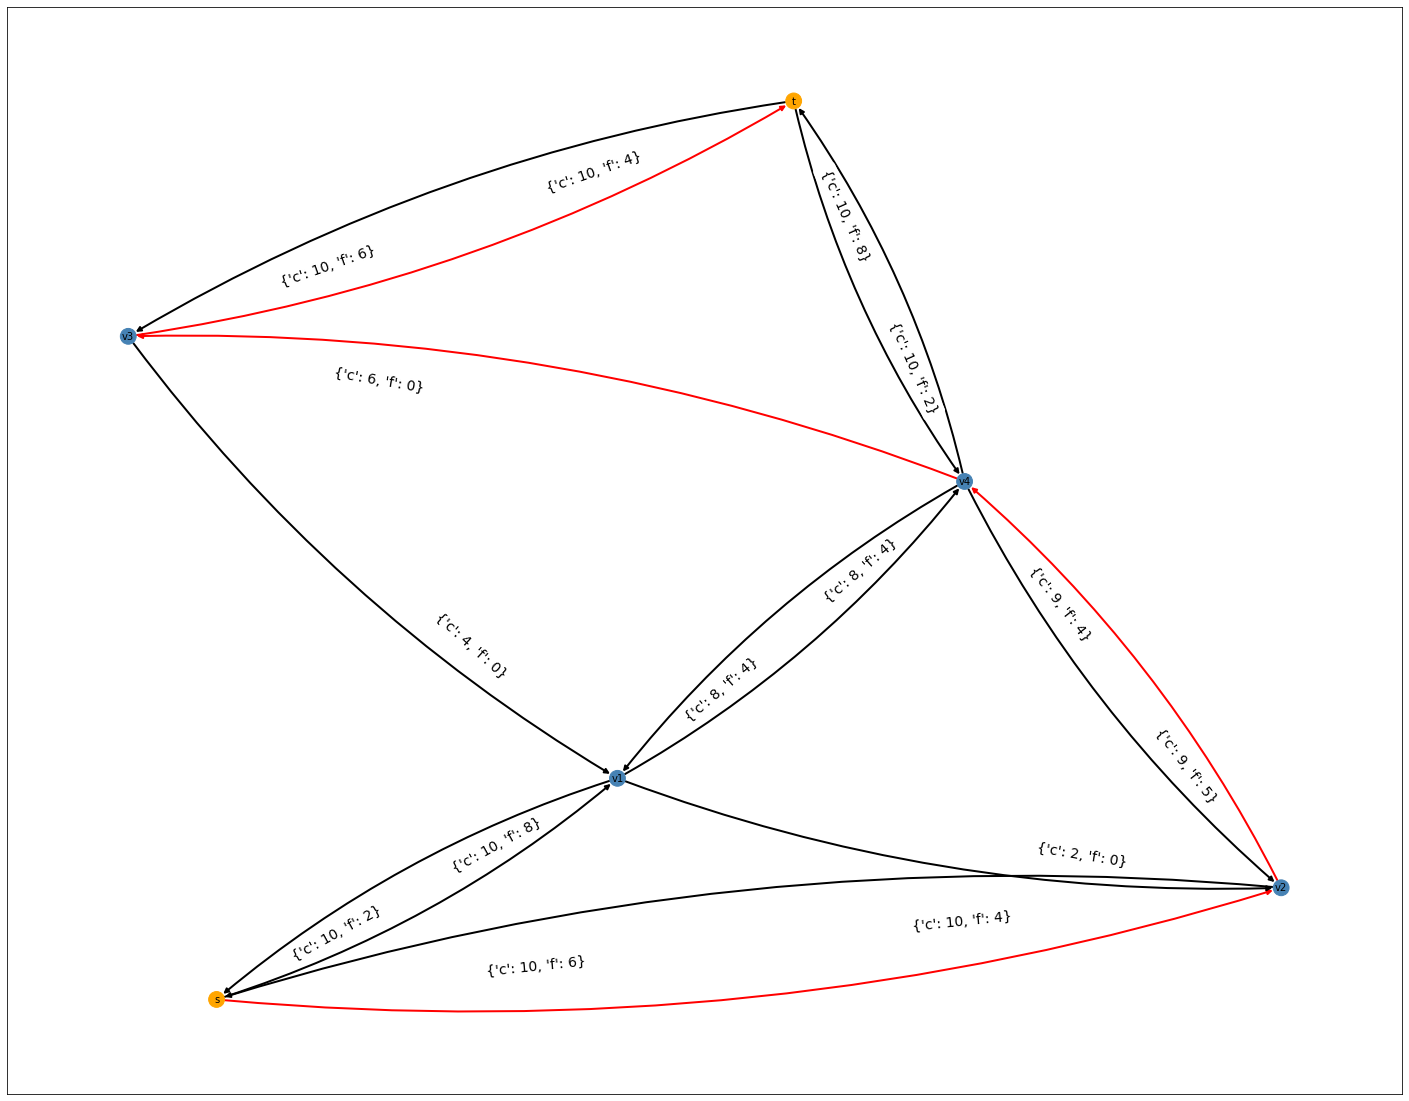

<Figure size 1500x1200 with 0 Axes>

	delta: 5




4a iteracao
Grafo residual


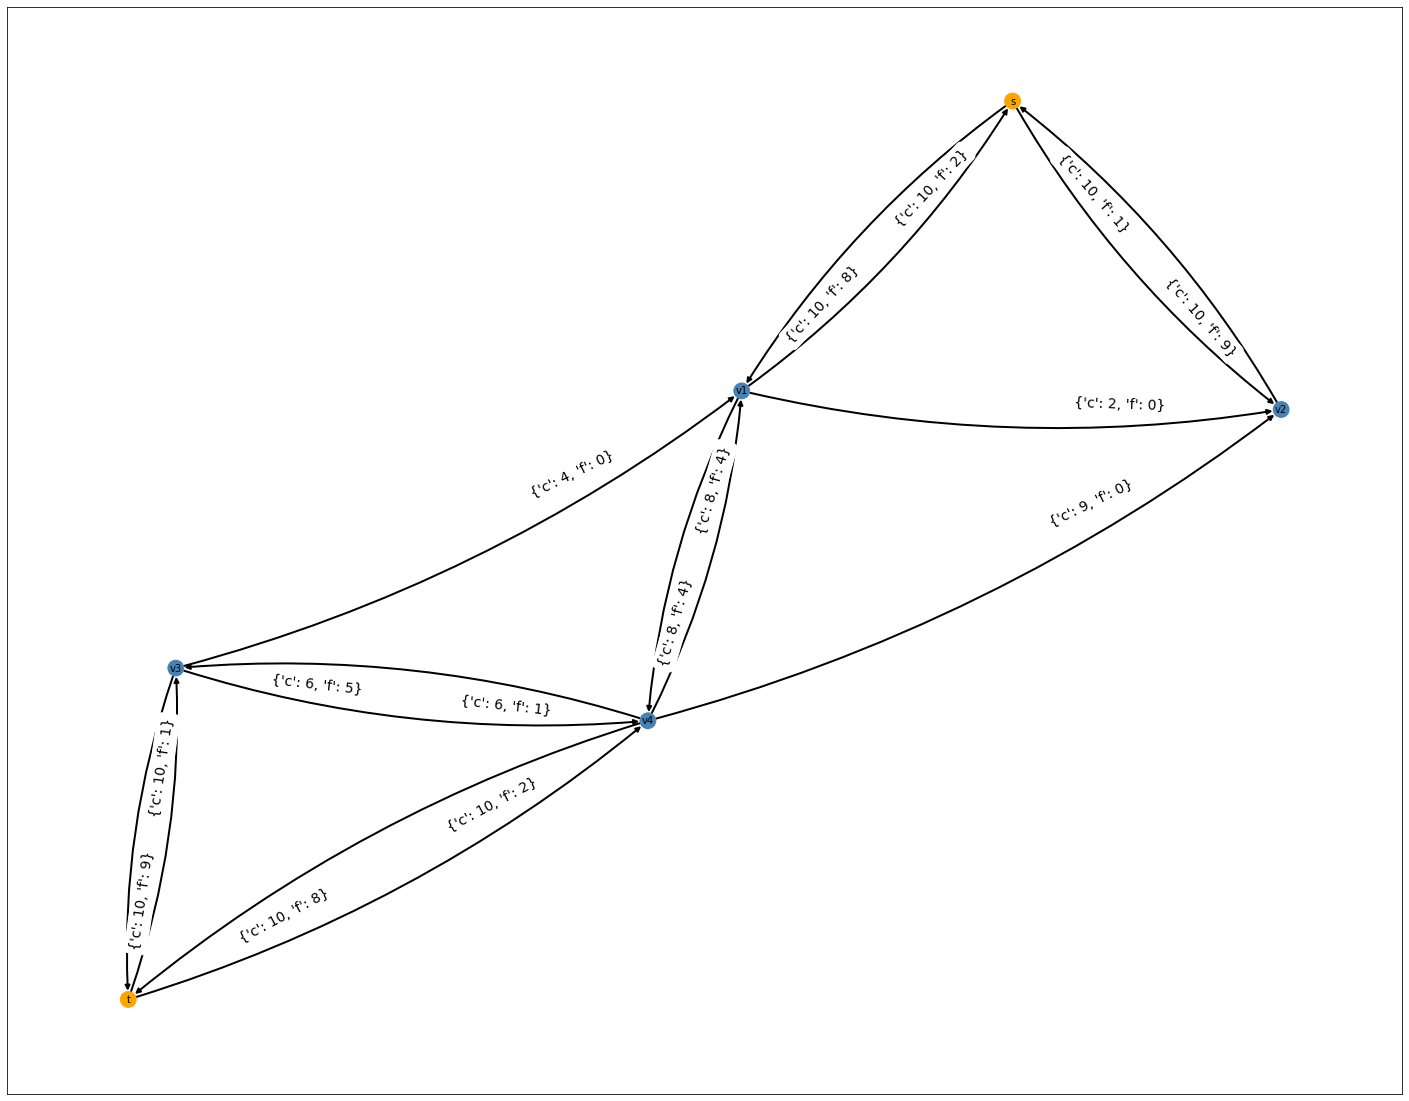

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', 'v1', 'v4', 't']


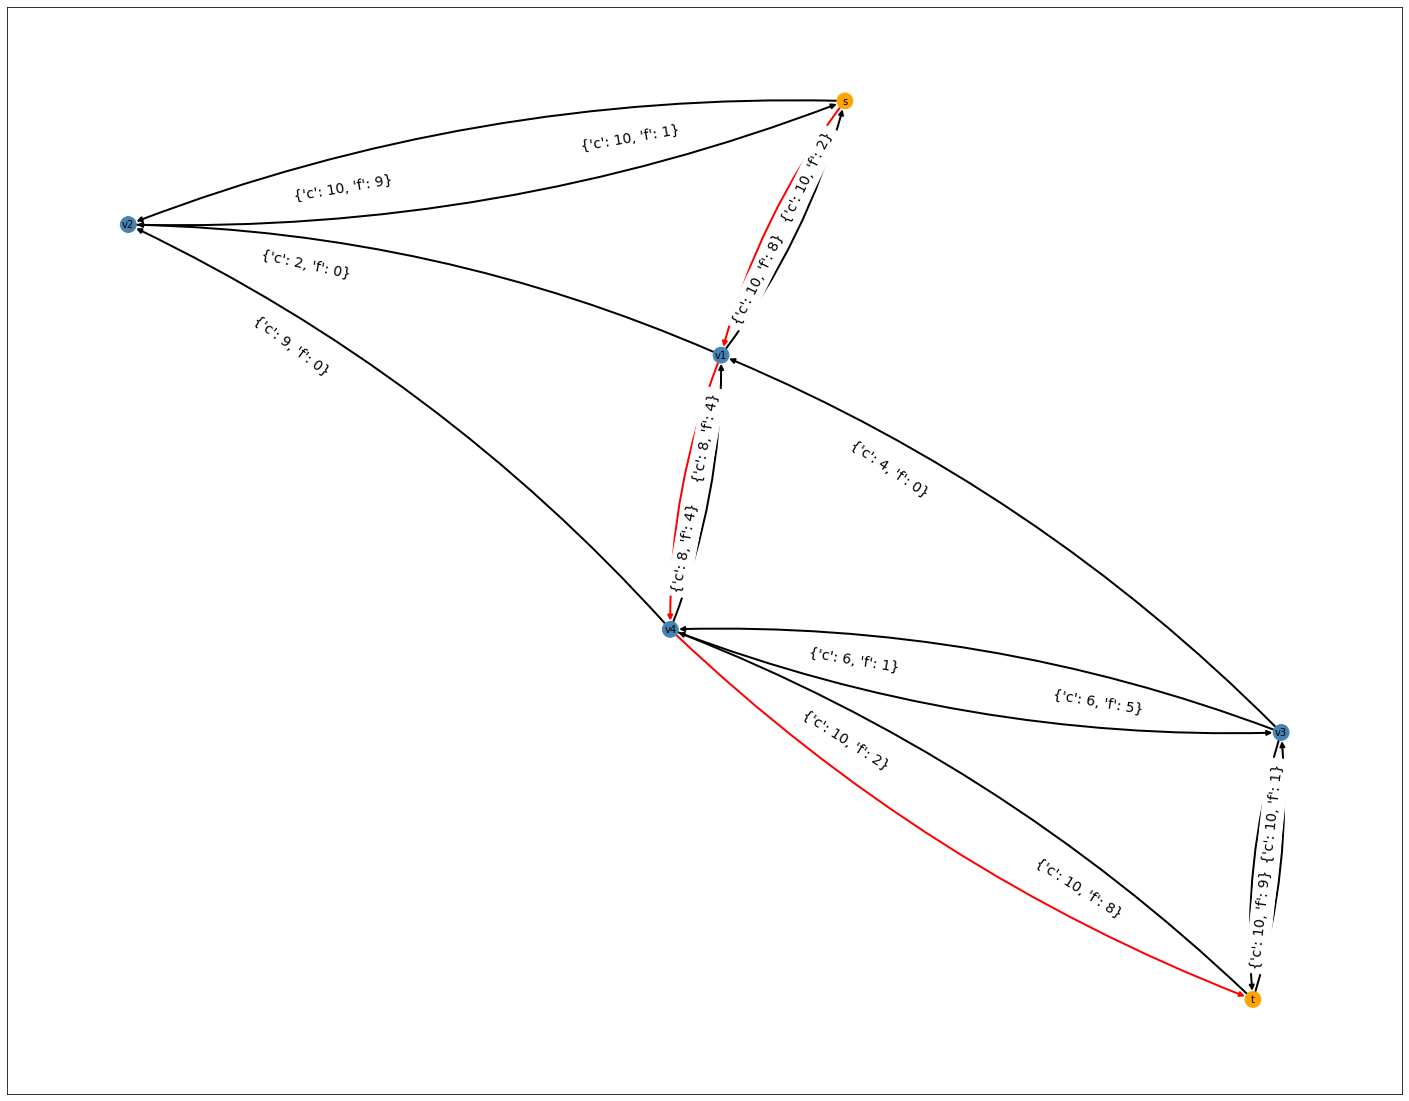

<Figure size 1500x1200 with 0 Axes>

	delta: 2




5a iteracao
Grafo residual


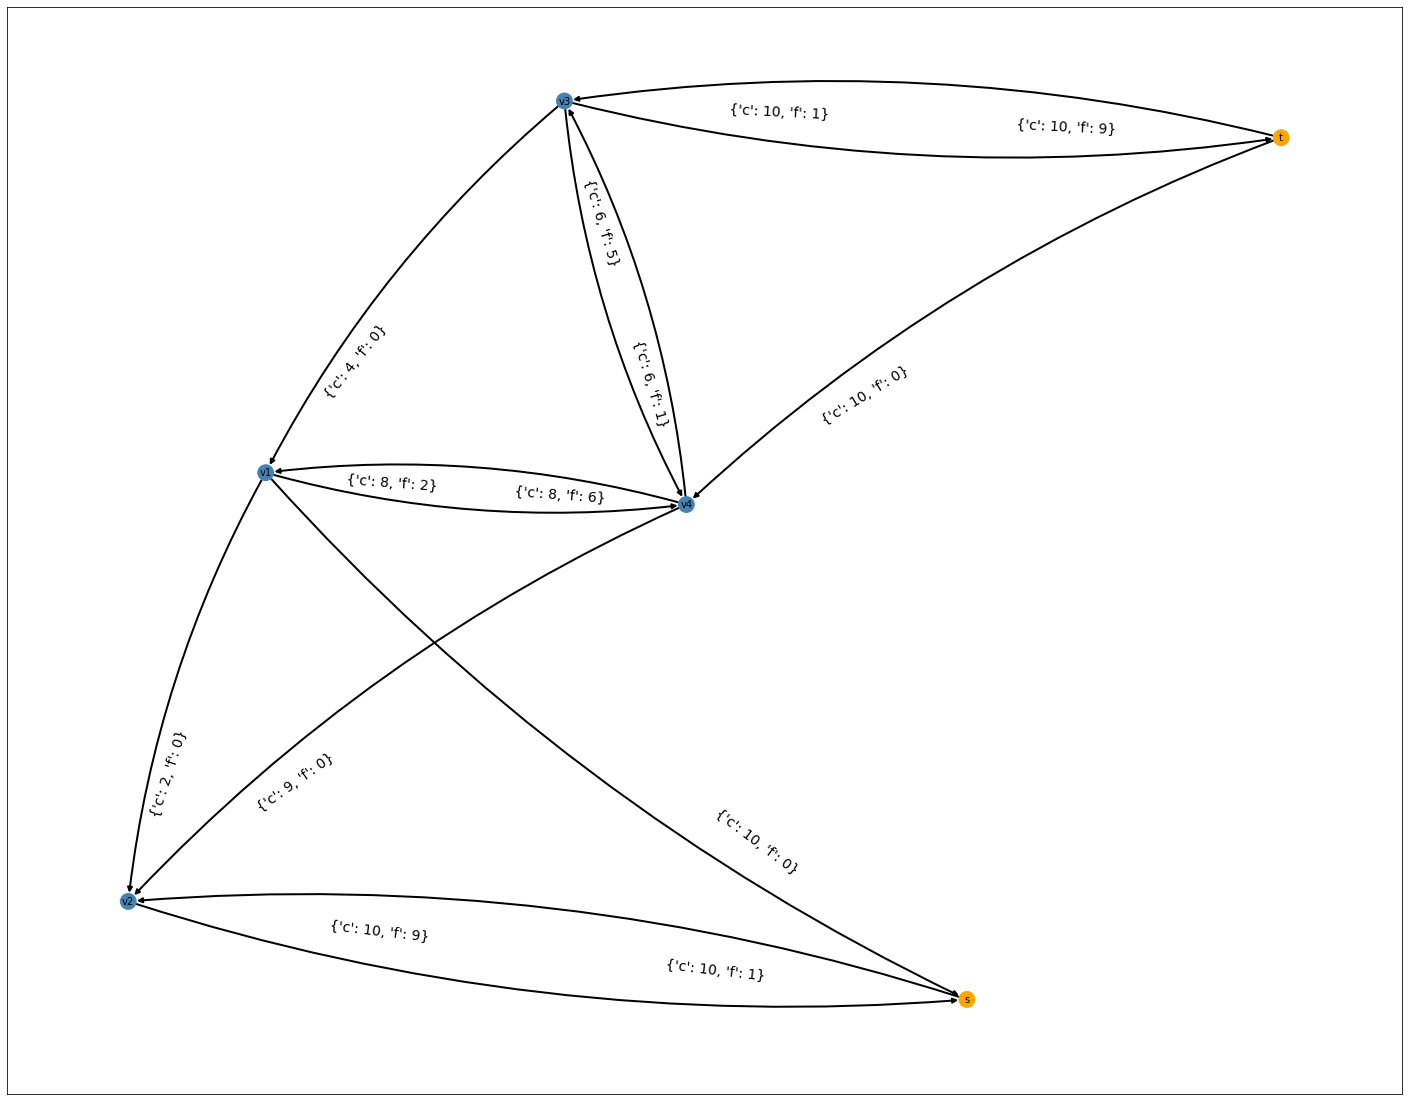

<Figure size 1500x1200 with 0 Axes>




fluxo maximo = 19
corte minimo ={['s', 'v2']}


In [362]:
G = nx.DiGraph()
G.add_edge('s', 'v1', c=10)
G.add_edge('s', 'v2', c=10)
G.add_edge('v1', 'v2', c=2)
G.add_edge('v1', 'v3', c=4)
G.add_edge('v1', 'v4', c=8)
G.add_edge('v2', 'v4', c=9)
G.add_edge('v3', 't', c=10)
G.add_edge('v4', 'v3', c=6)
G.add_edge('v4', 't', c=10)

plot_graph(G, 's', 't', None)
print("\n")

x, t = ford_fulkerson_algo(G, 's', 't')
print("\n\n\nfluxo maximo =", x)
print("corte minimo ={", t, "}", sep="")

---

## Exemplo 2(Video: max Flow Ford Fulkerson | Network Flow | Graph Theory)

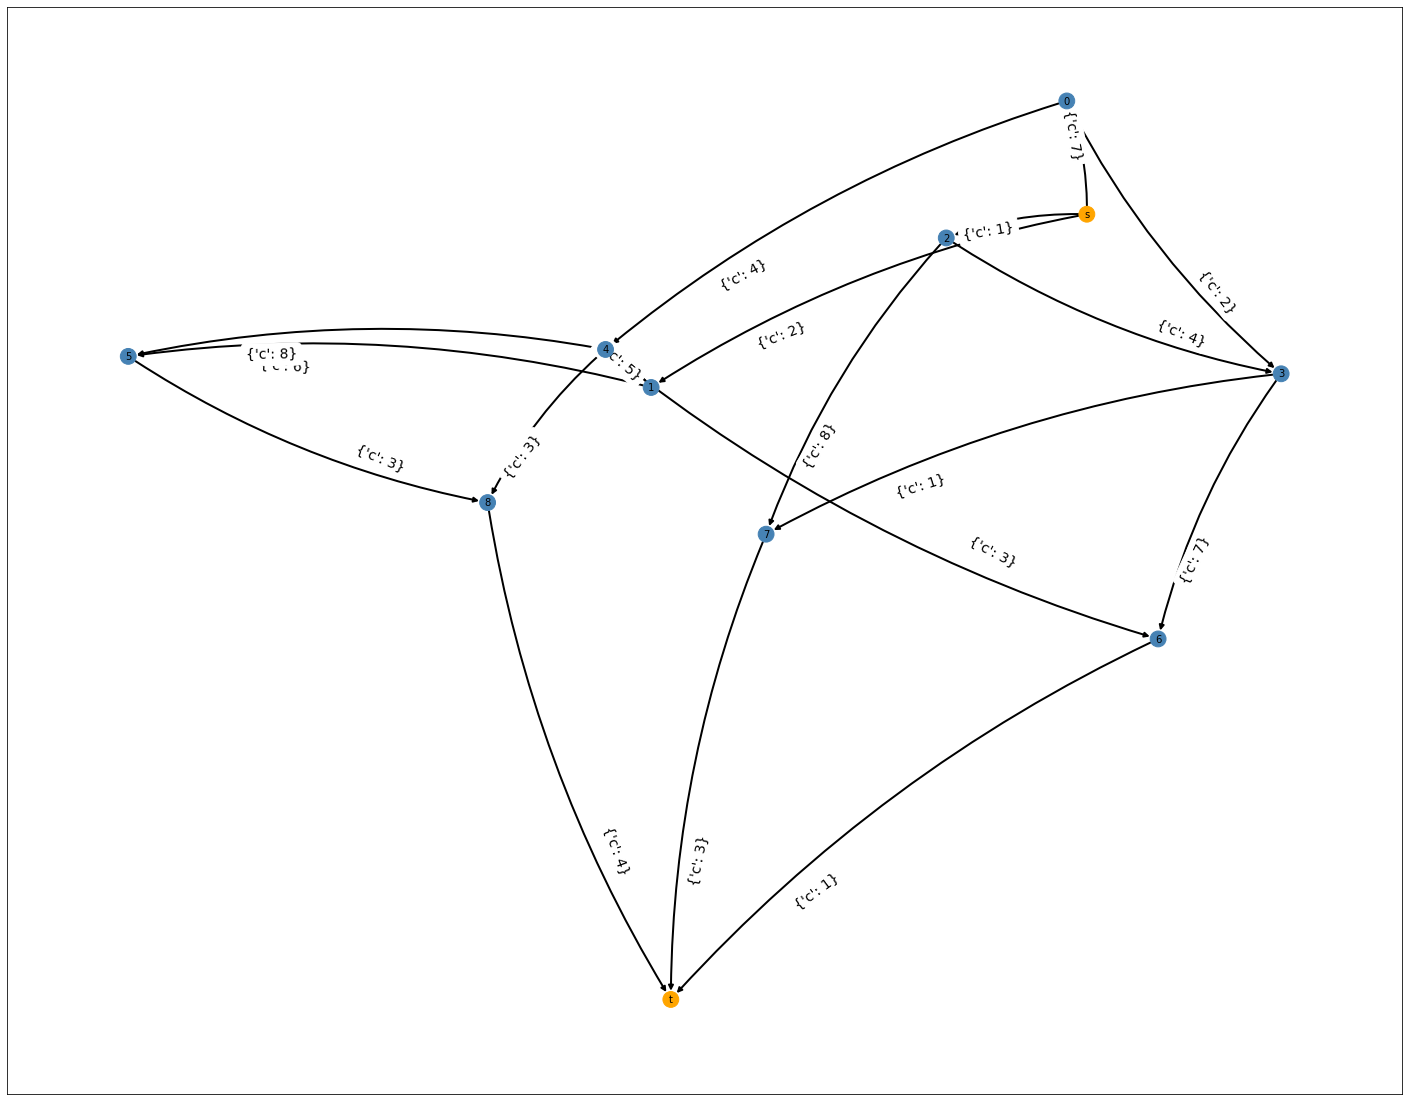

<Figure size 1500x1200 with 0 Axes>

1a iteracao
Grafo residual


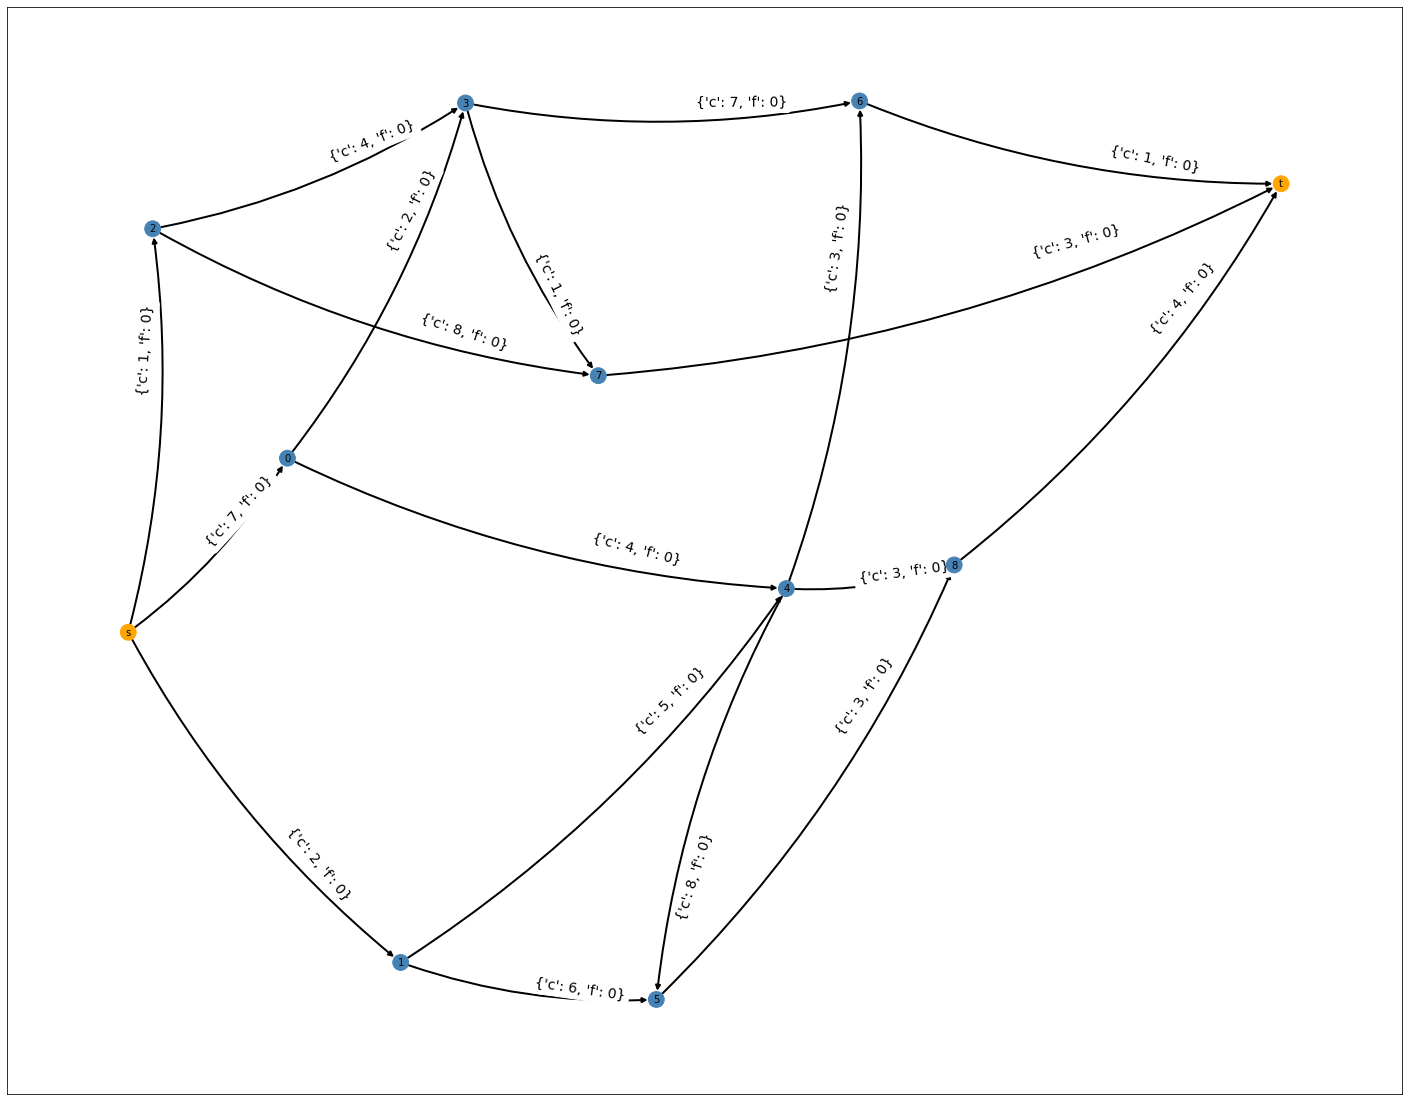

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', '0', '4', '5', '8', 't']


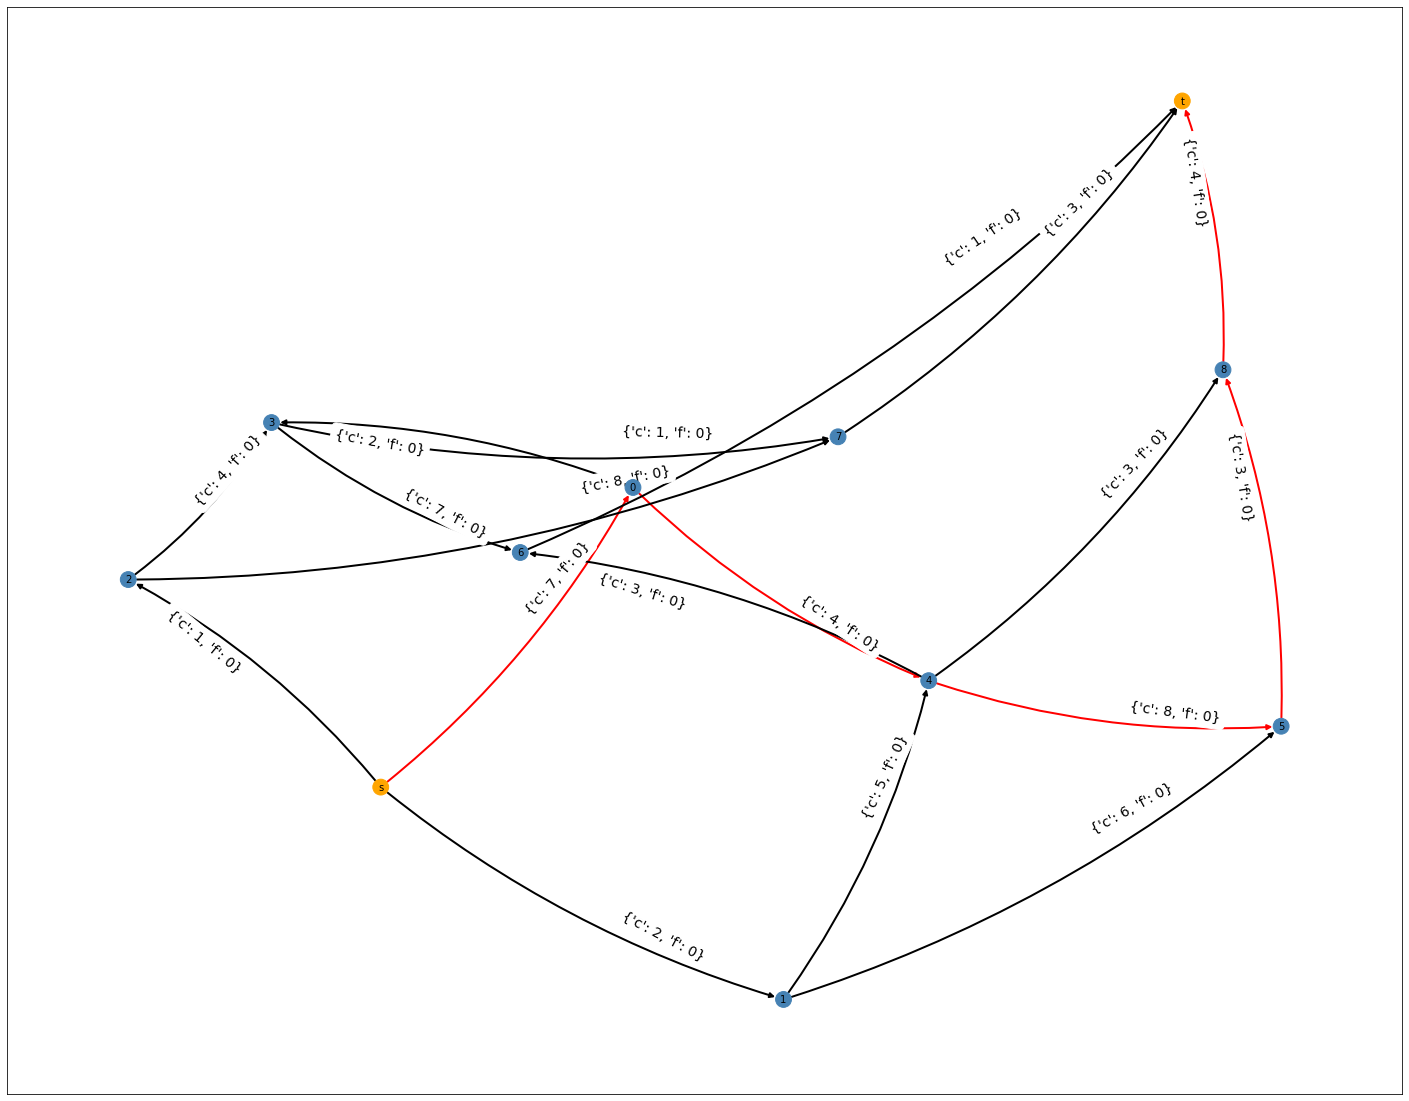

<Figure size 1500x1200 with 0 Axes>

	delta: 3




2a iteracao
Grafo residual


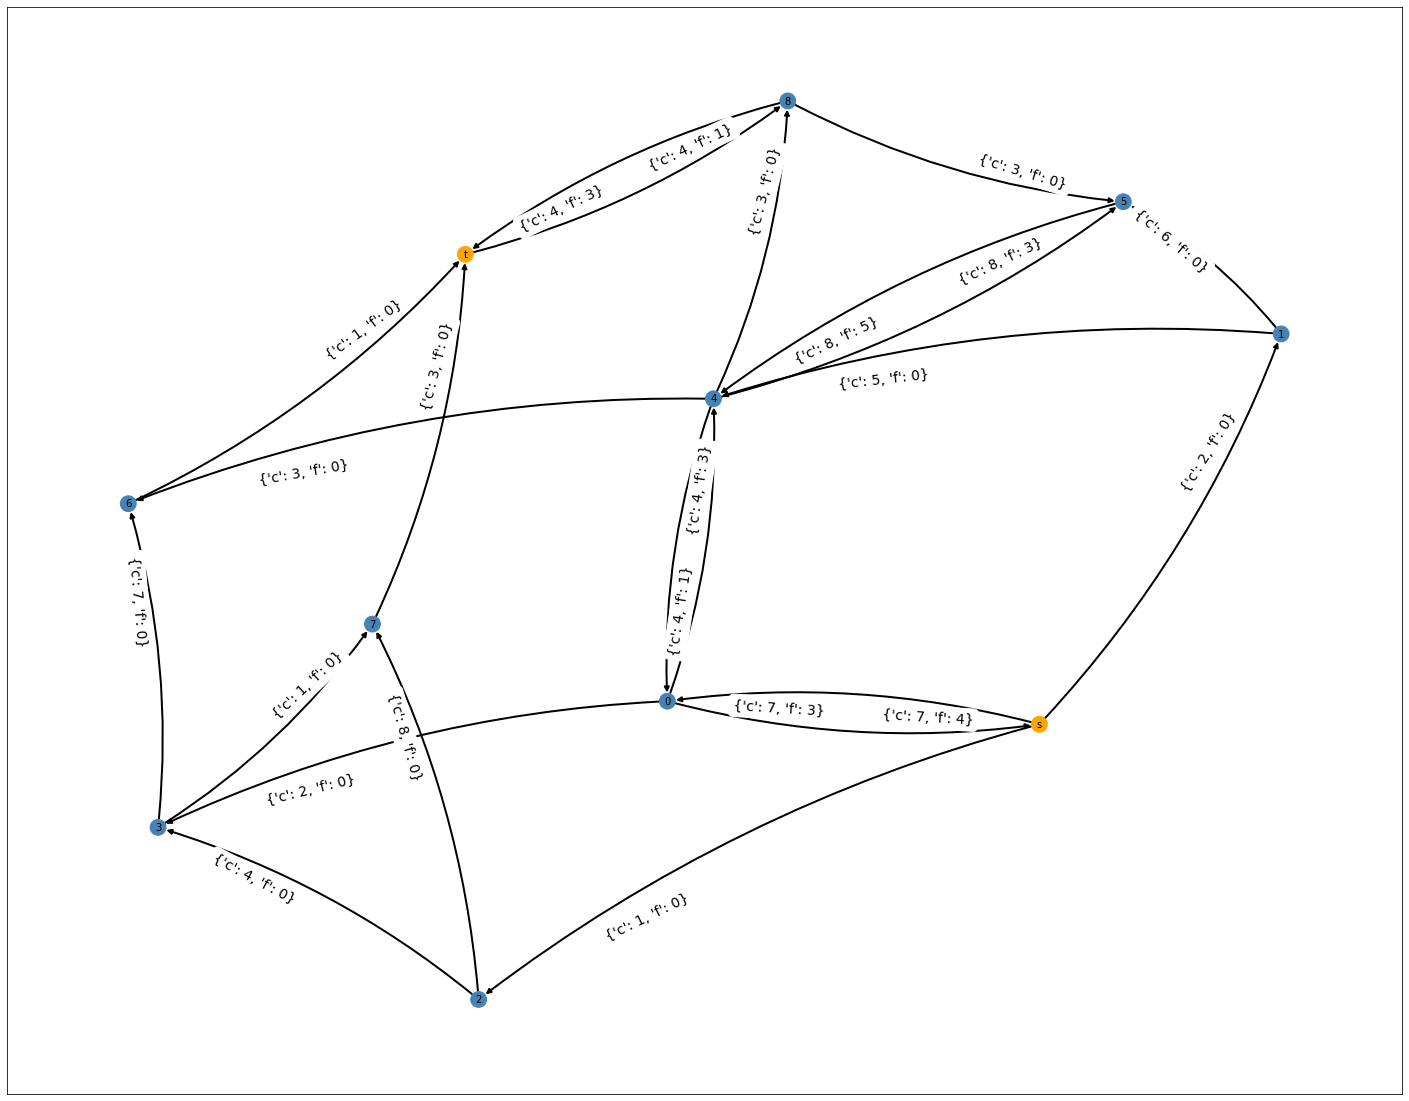

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', '0', '3', '6', 't']


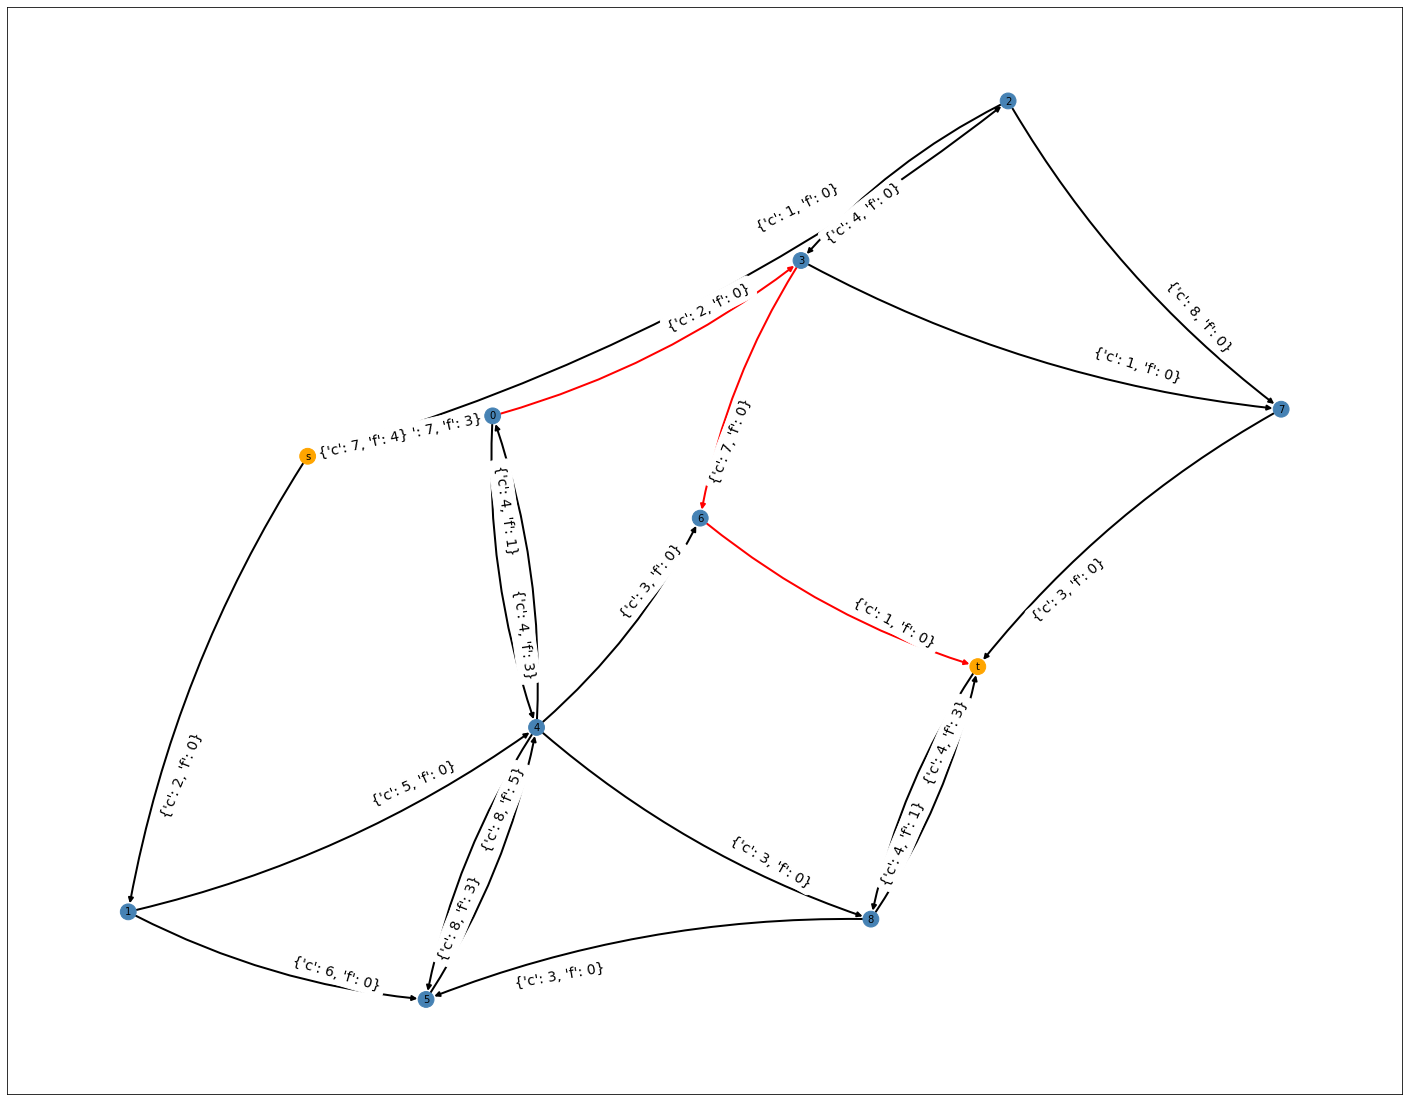

<Figure size 1500x1200 with 0 Axes>

	delta: 1




3a iteracao
Grafo residual


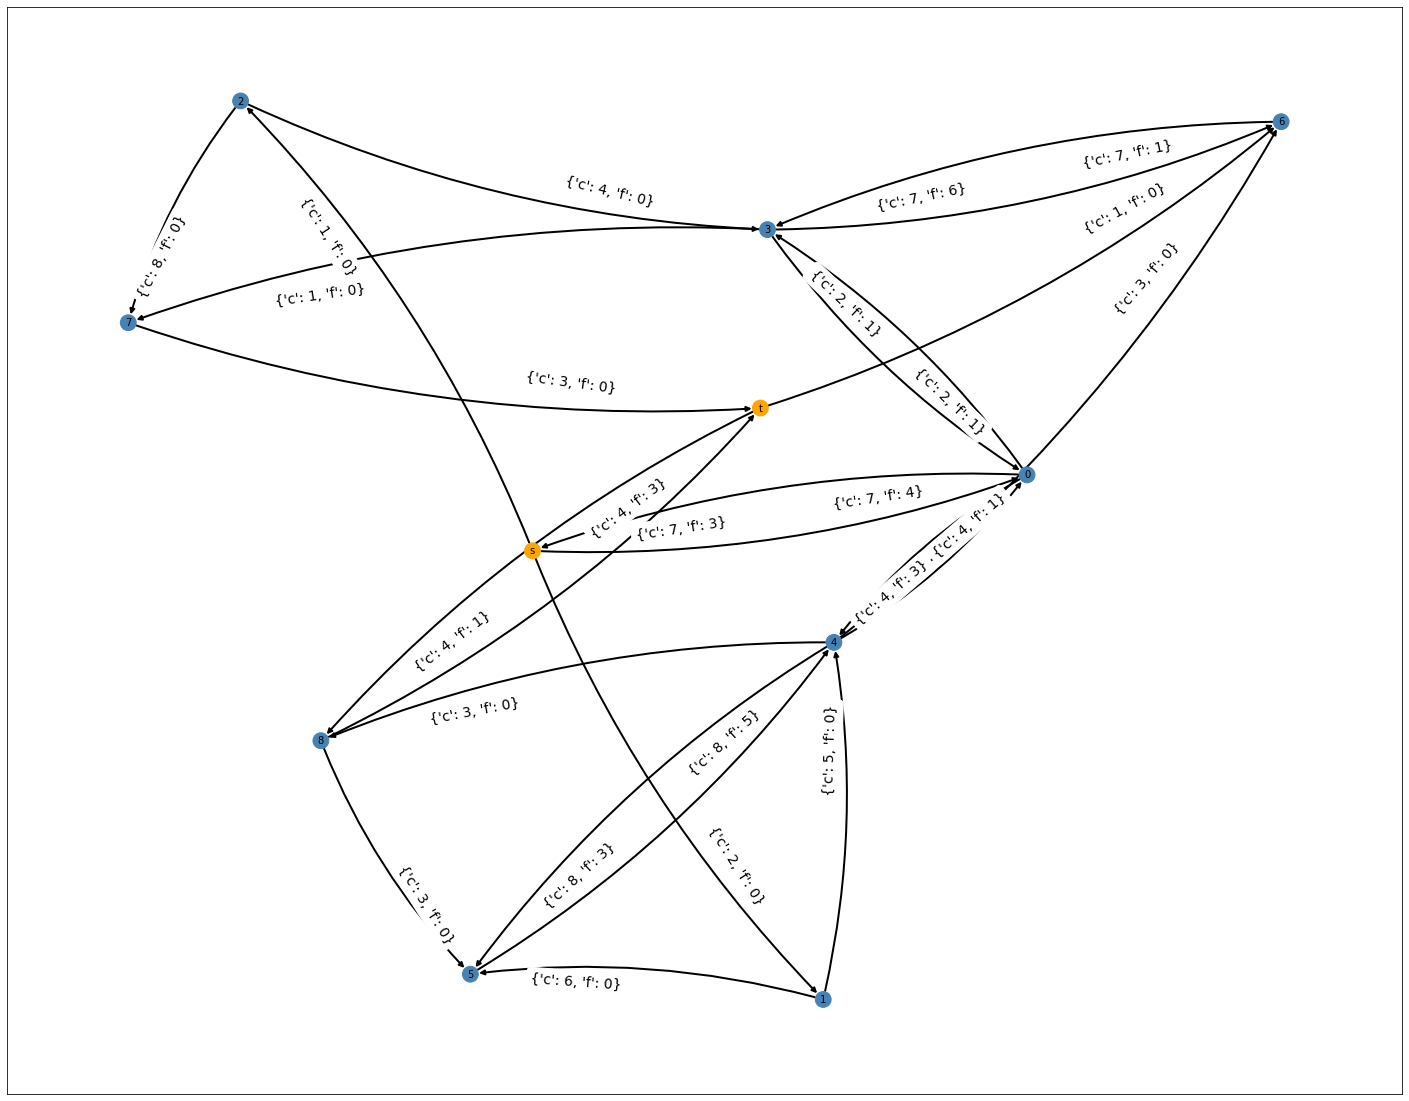

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', '0', '3', '7', 't']


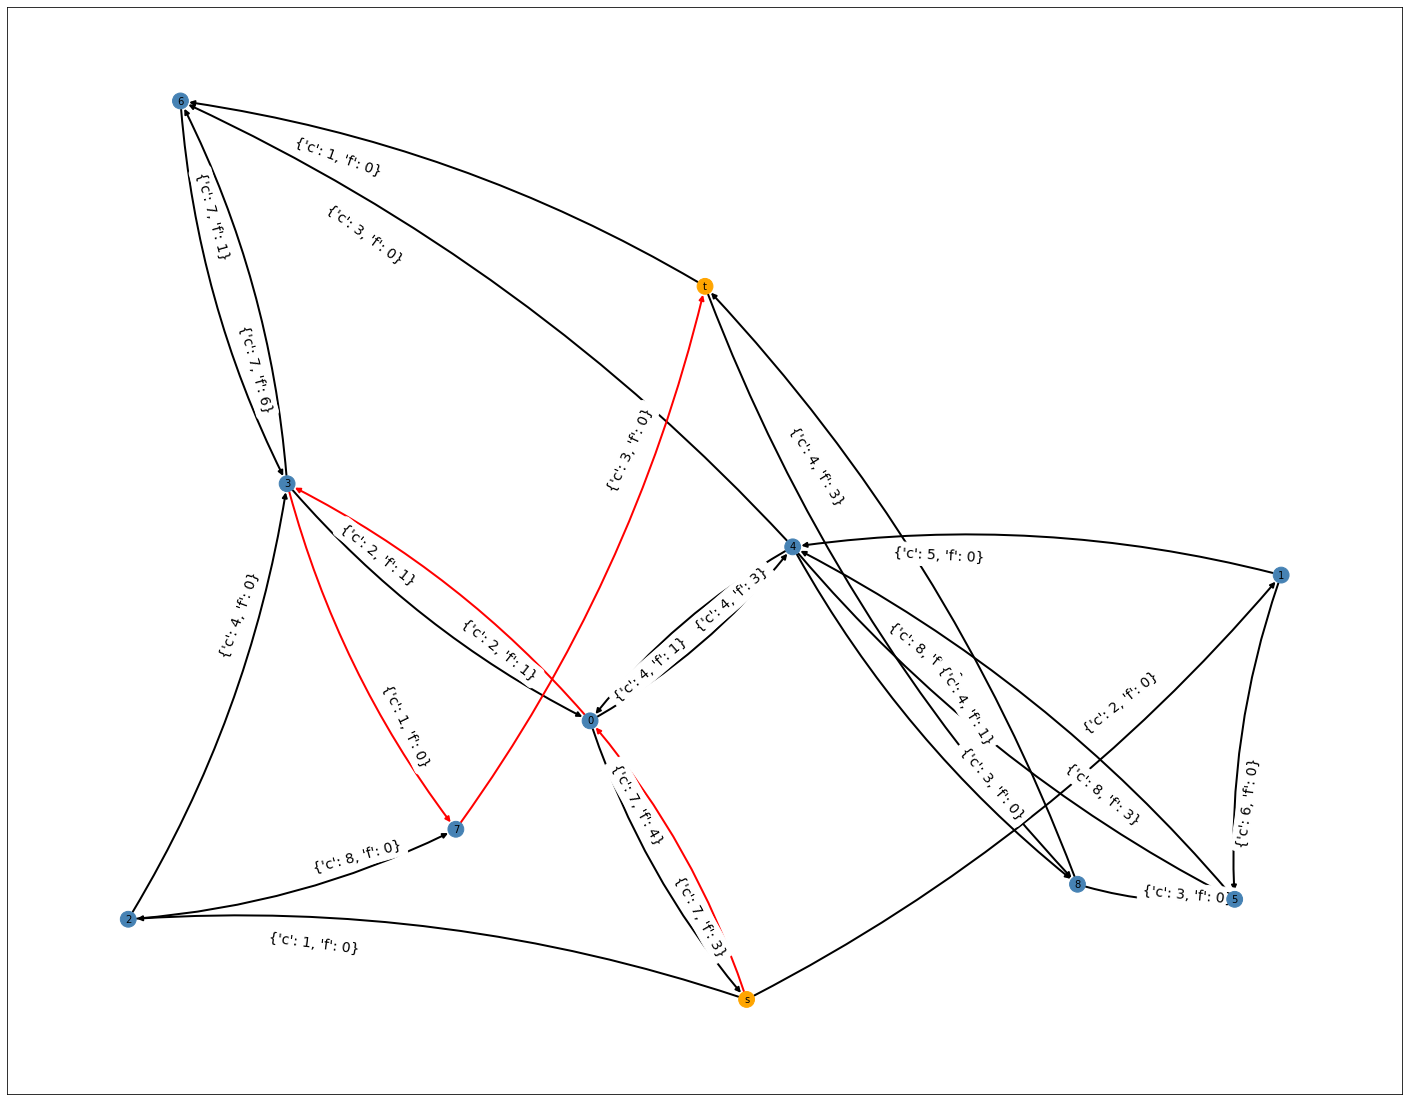

<Figure size 1500x1200 with 0 Axes>

	delta: 1




4a iteracao
Grafo residual


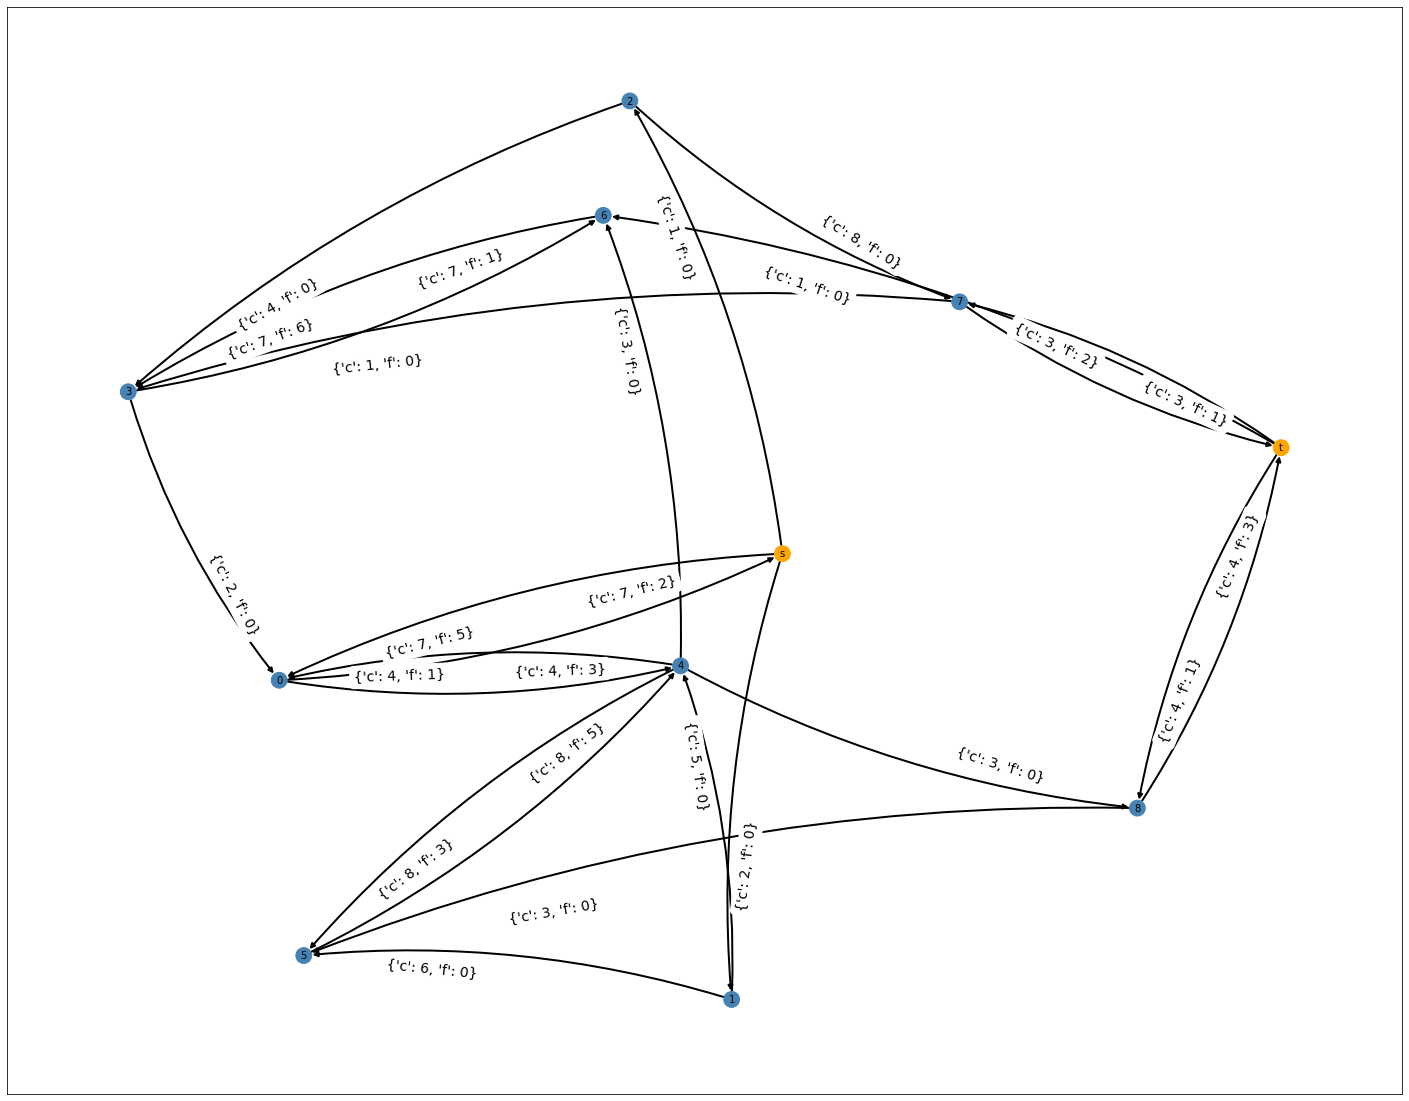

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', '0', '4', '8', 't']


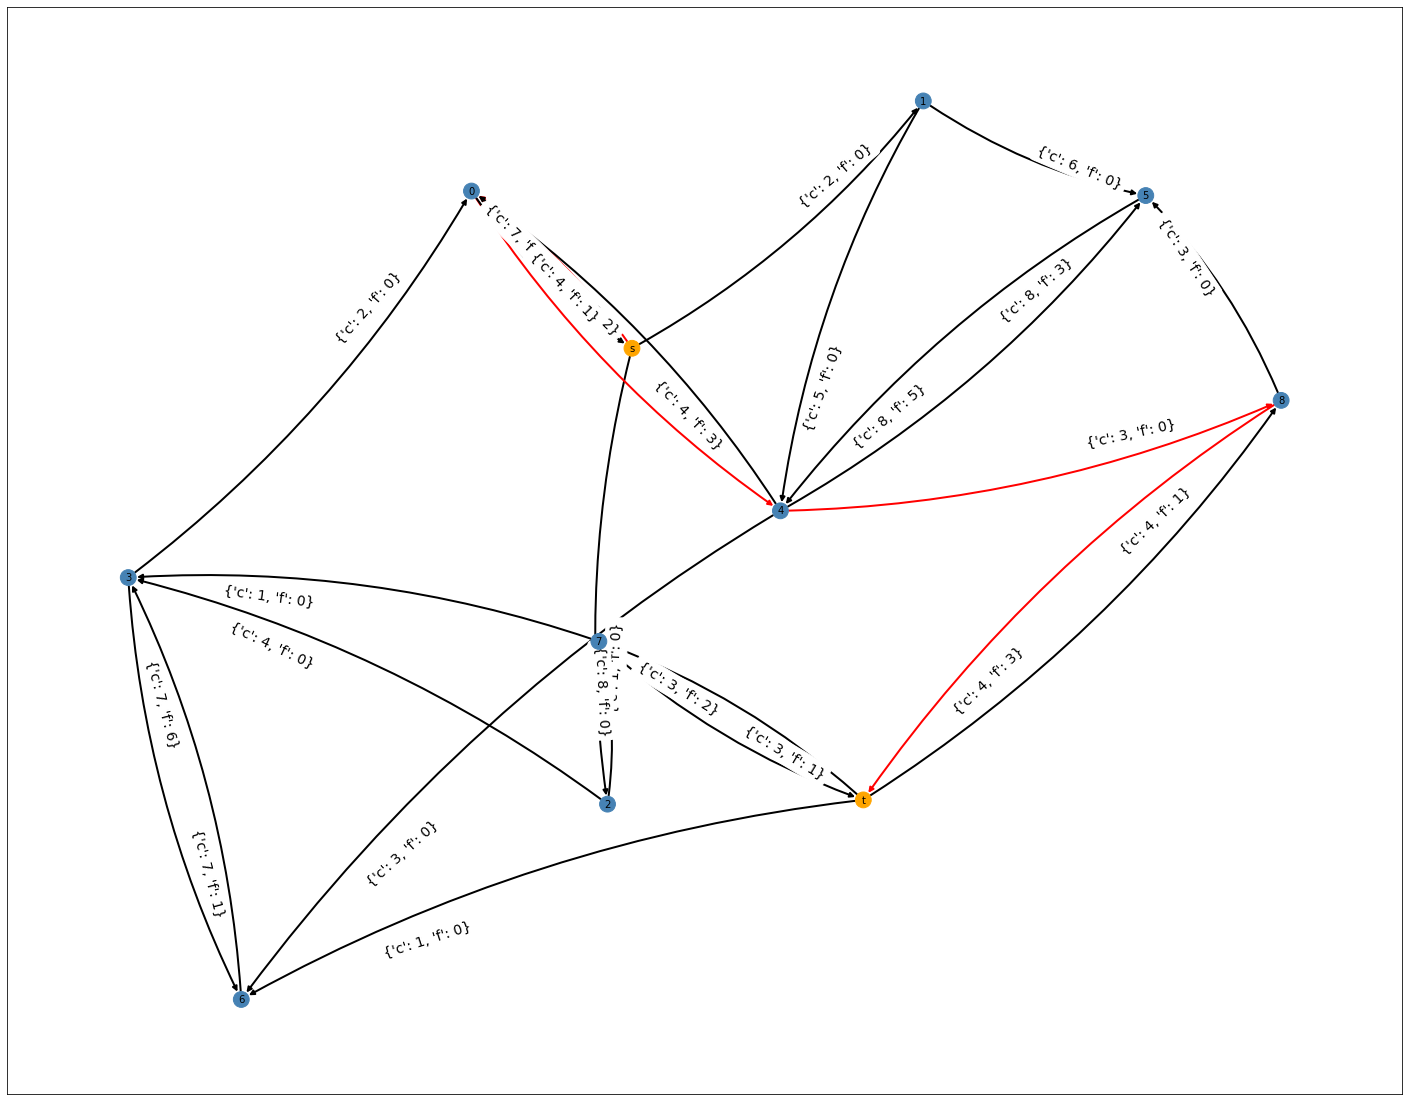

<Figure size 1500x1200 with 0 Axes>

	delta: 1




5a iteracao
Grafo residual


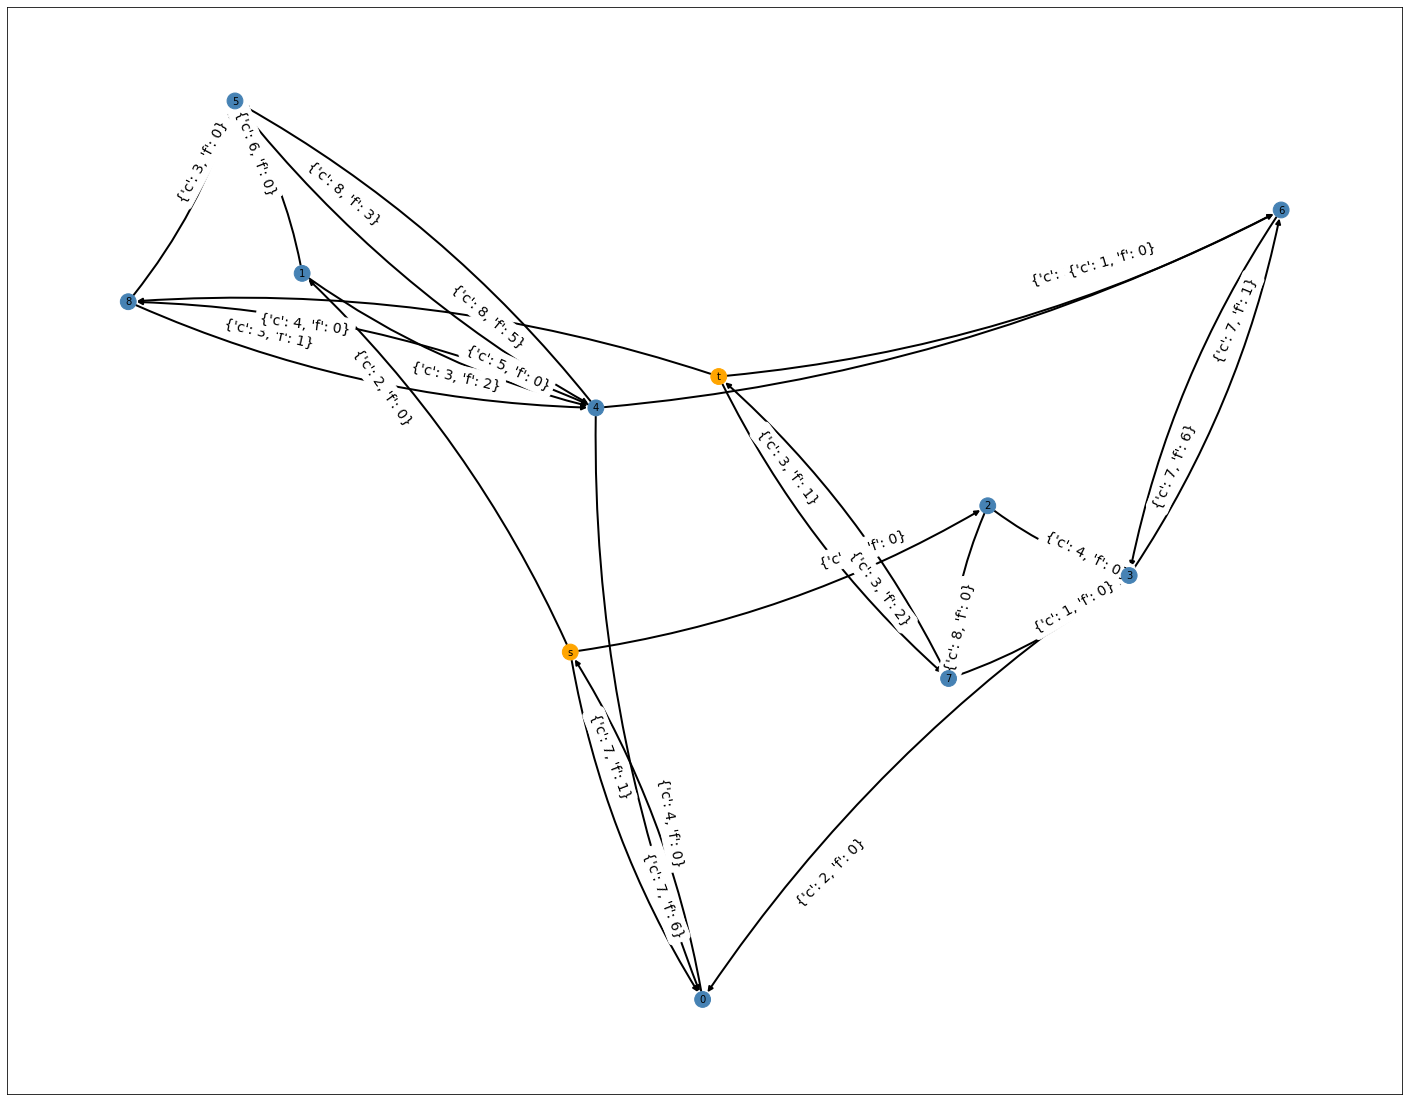

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', '2', '7', 't']


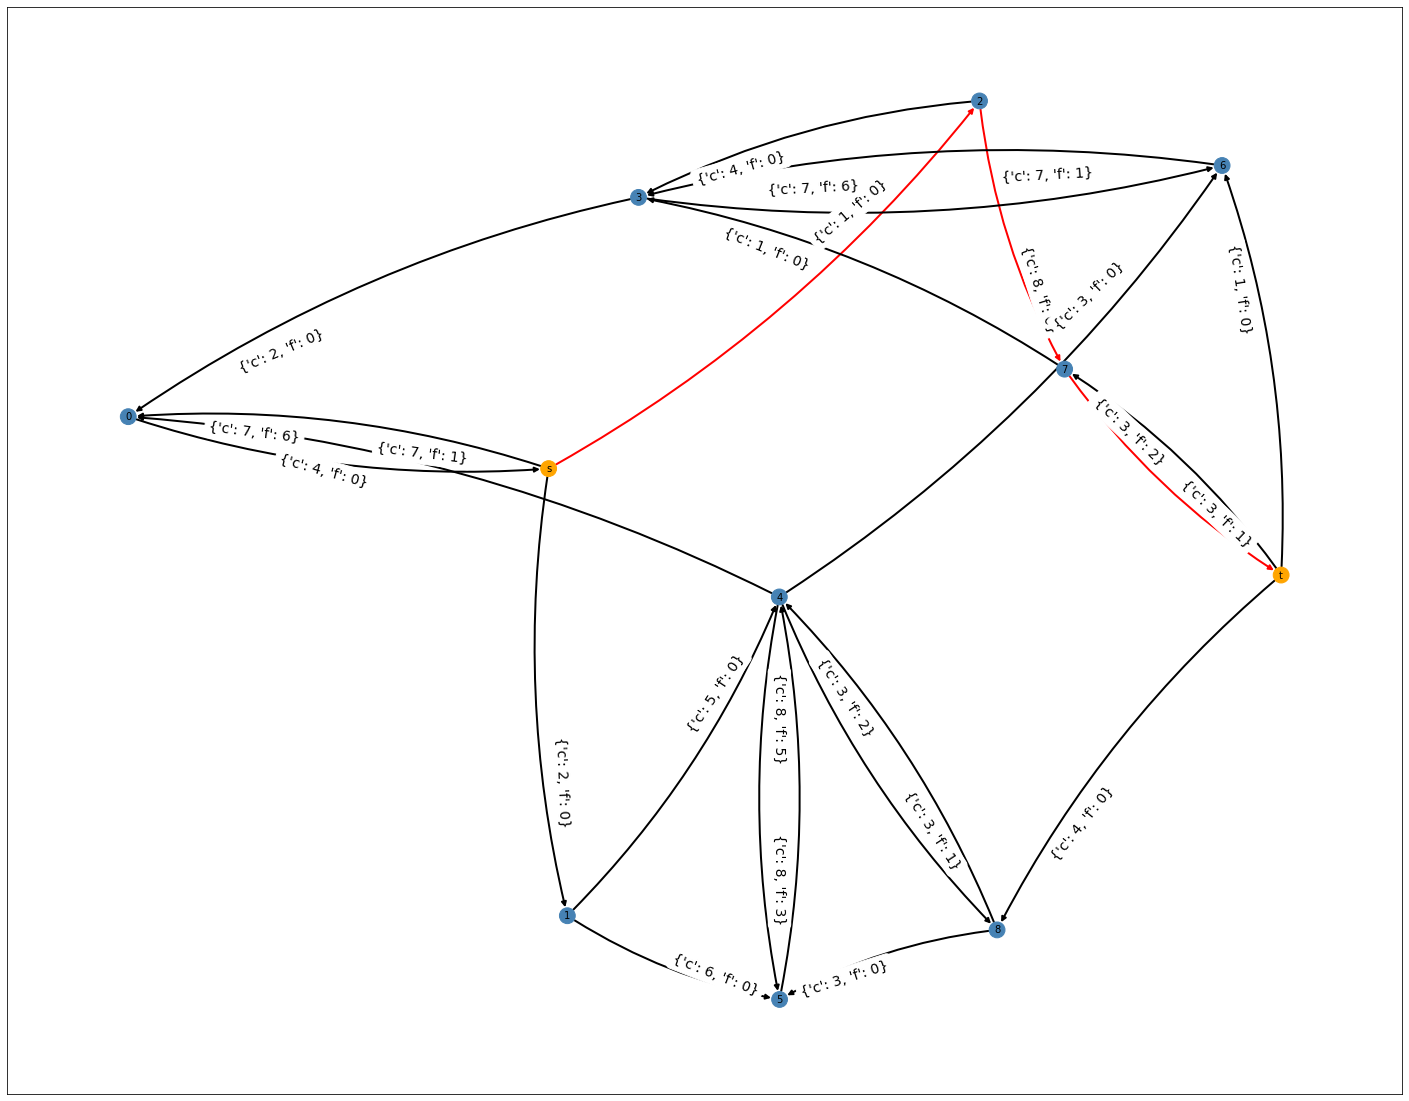

<Figure size 1500x1200 with 0 Axes>

	delta: 1




6a iteracao
Grafo residual


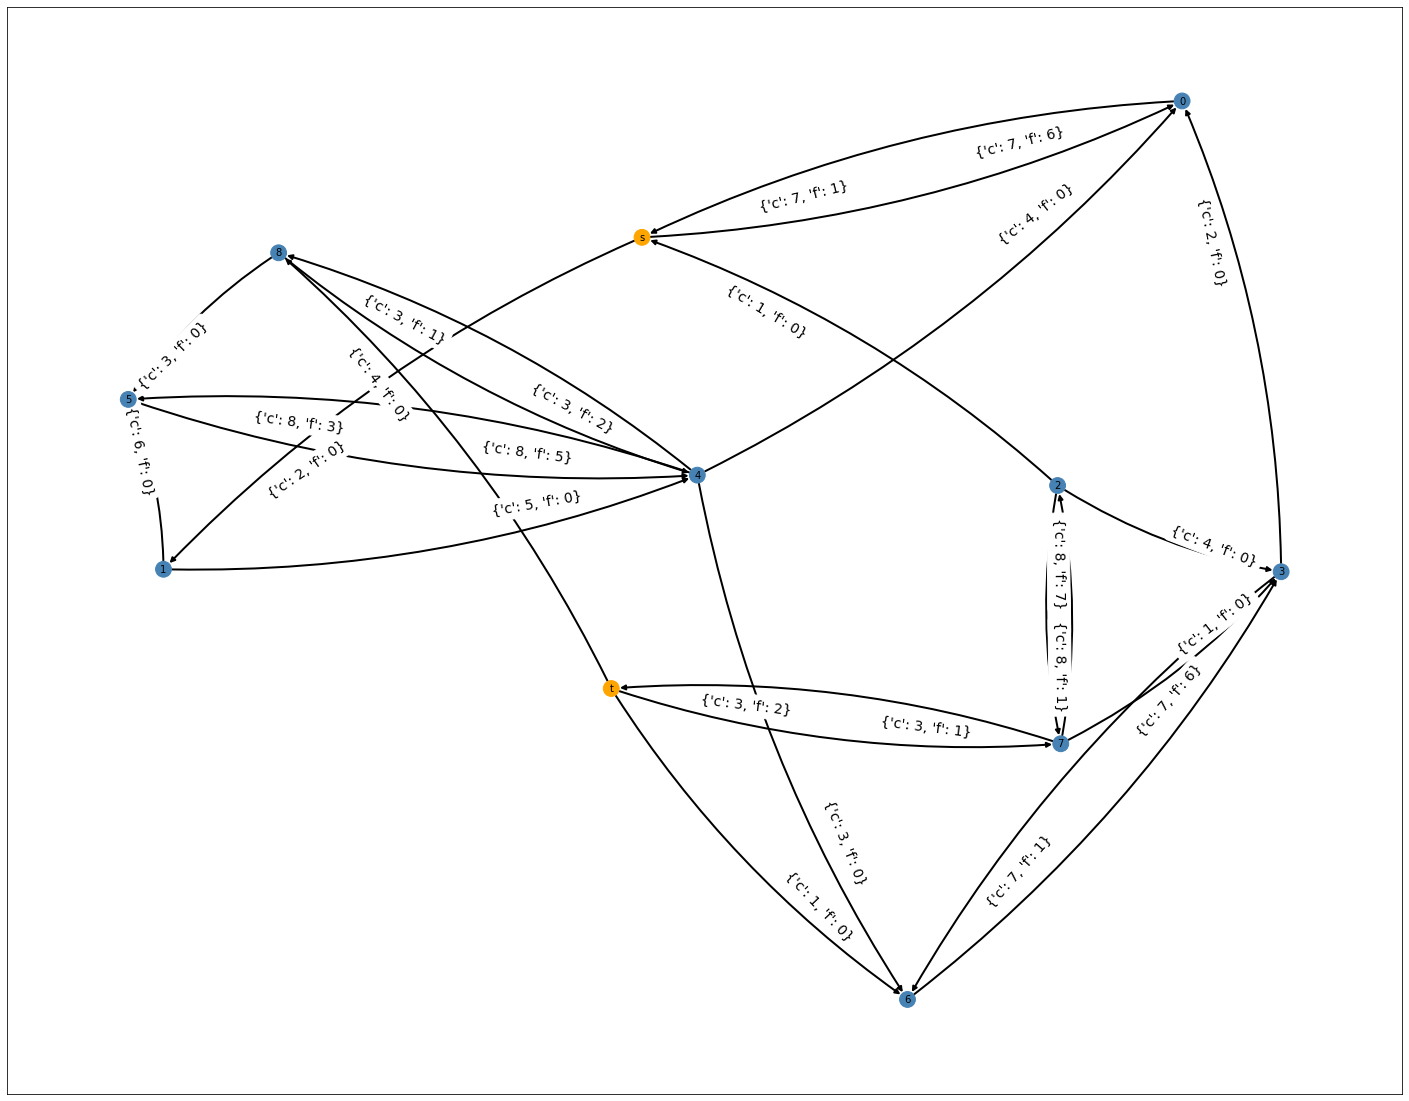

<Figure size 1500x1200 with 0 Axes>

fluxo maximo = 7
corte minimo ={['s', '0', '1', '4', '5', '6', '8', '3']}


In [364]:
G = nx.DiGraph()
G.add_edge('s', '0', c=7)
G.add_edge('s', '1', c=2)
G.add_edge('s', '2', c=1)
G.add_edge('0', '3', c=2)
G.add_edge('0', '4', c=4)
G.add_edge('1', '4', c=5)
G.add_edge('1', '5', c=6)
G.add_edge('2', '3', c=4)
G.add_edge('2', '7', c=8)
G.add_edge('3', '6', c=7)
G.add_edge('3', '7', c=1)
G.add_edge('4', '6', c=3)
G.add_edge('4', '8', c=3)
G.add_edge('4', '5', c=8)
G.add_edge('5', '8', c=3)
G.add_edge('6', 't', c=1)
G.add_edge('7', 't', c=3)
G.add_edge('8', 't', c=4)

plot_graph(G, 's', 't', None)
print("\n")

x, t = ford_fulkerson_algo(G, 's', 't')
print("fluxo maximo =", x)
print("corte minimo ={", t, "}", sep="")


---

## Exemplo 3 (Video: Ford-Fulkerson Algorithm)

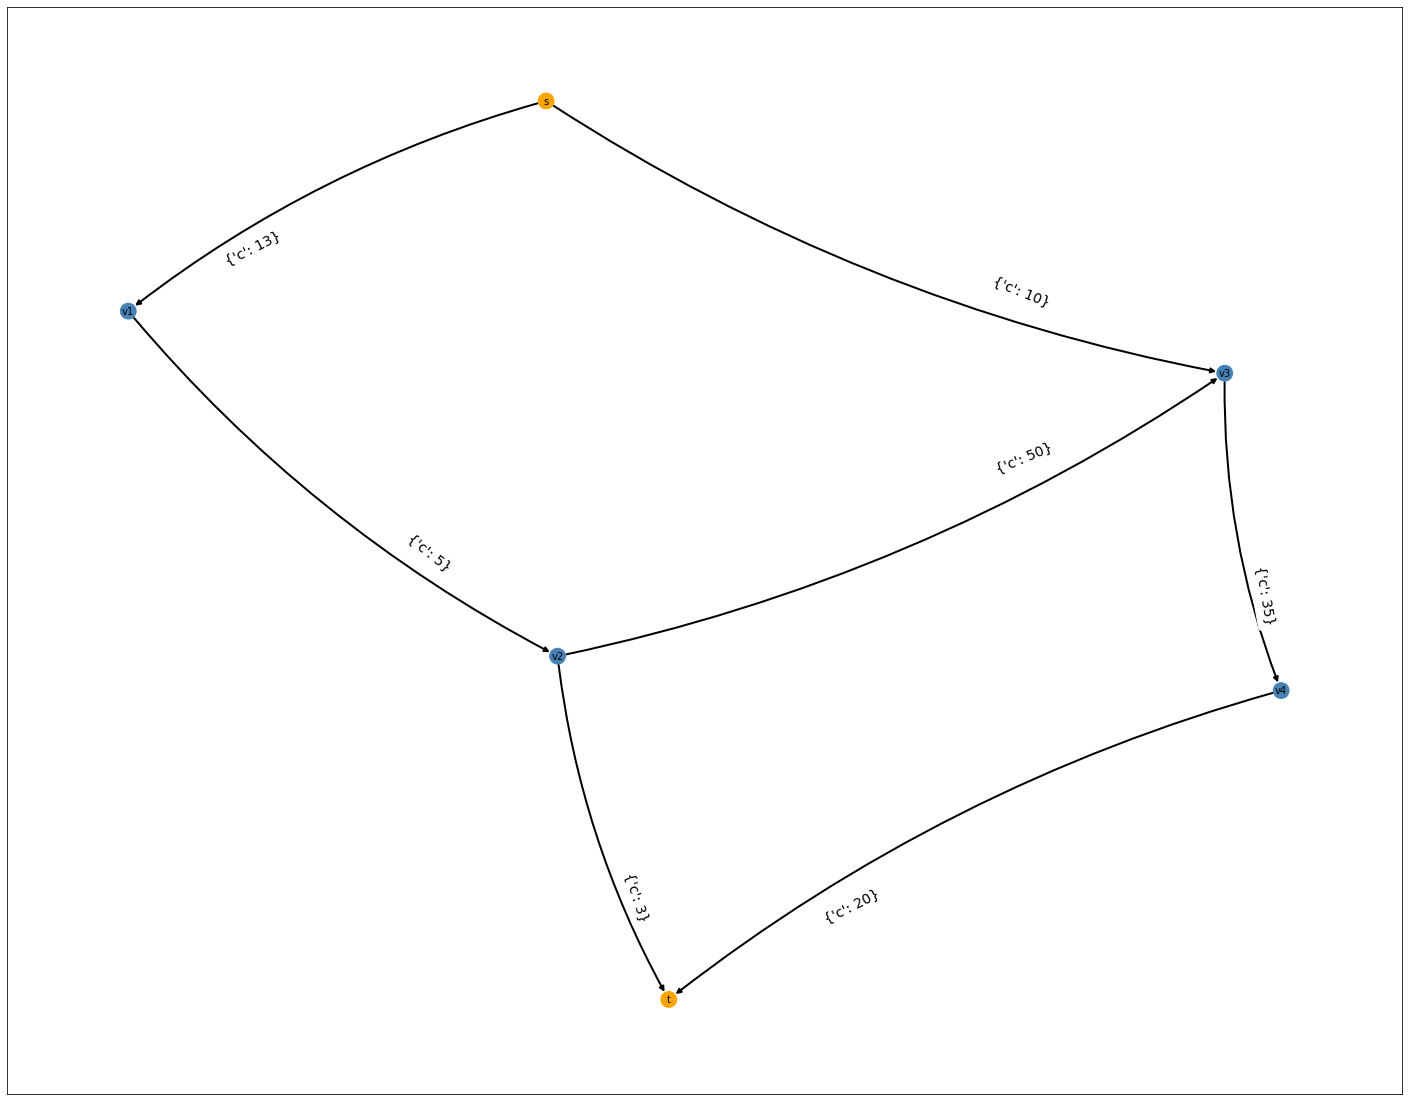

<Figure size 1500x1200 with 0 Axes>

1a iteracao
Grafo residual


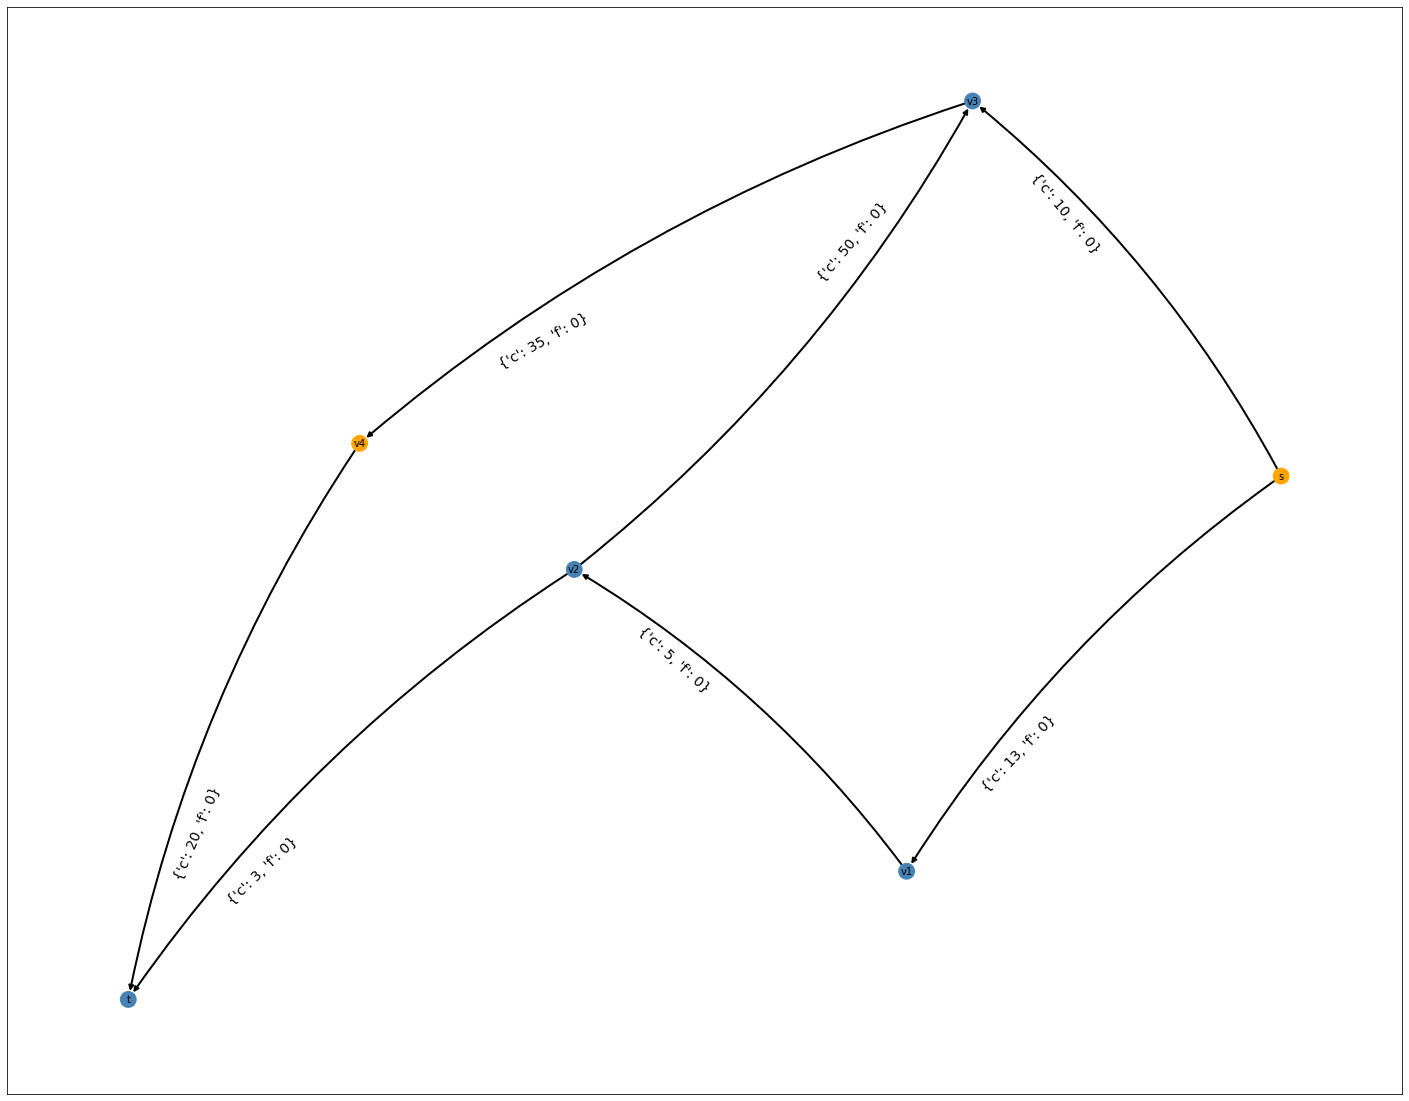

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', 'v1', 'v2', 'v3', 'v4', 't']


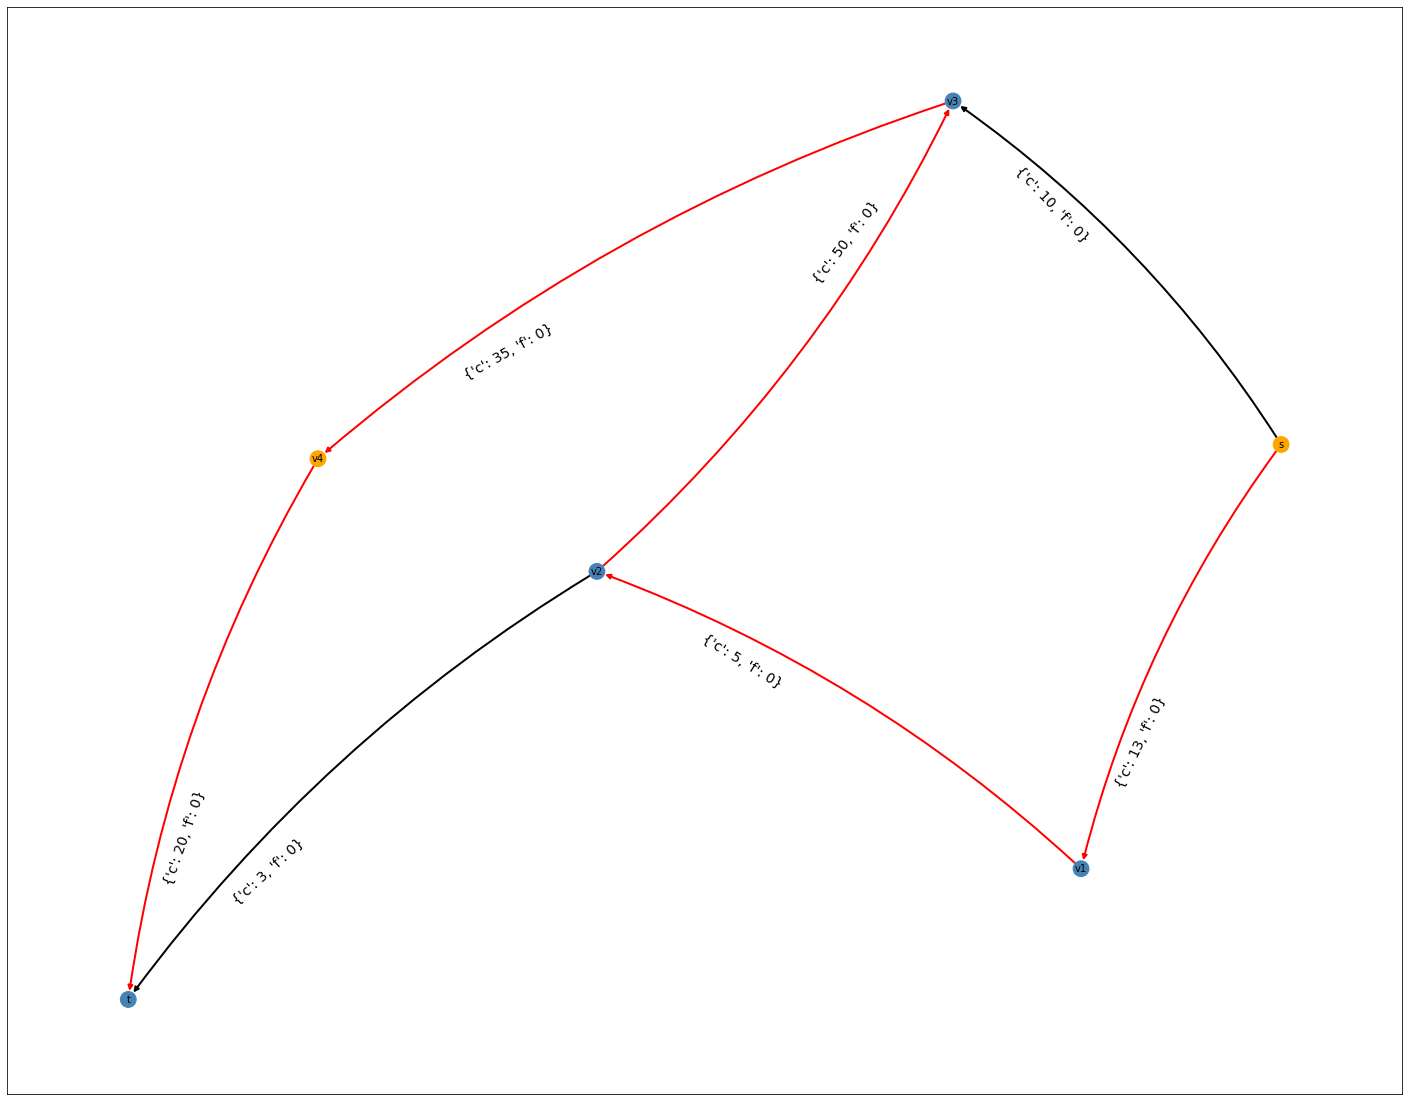

<Figure size 1500x1200 with 0 Axes>

	delta: 5




2a iteracao
Grafo residual


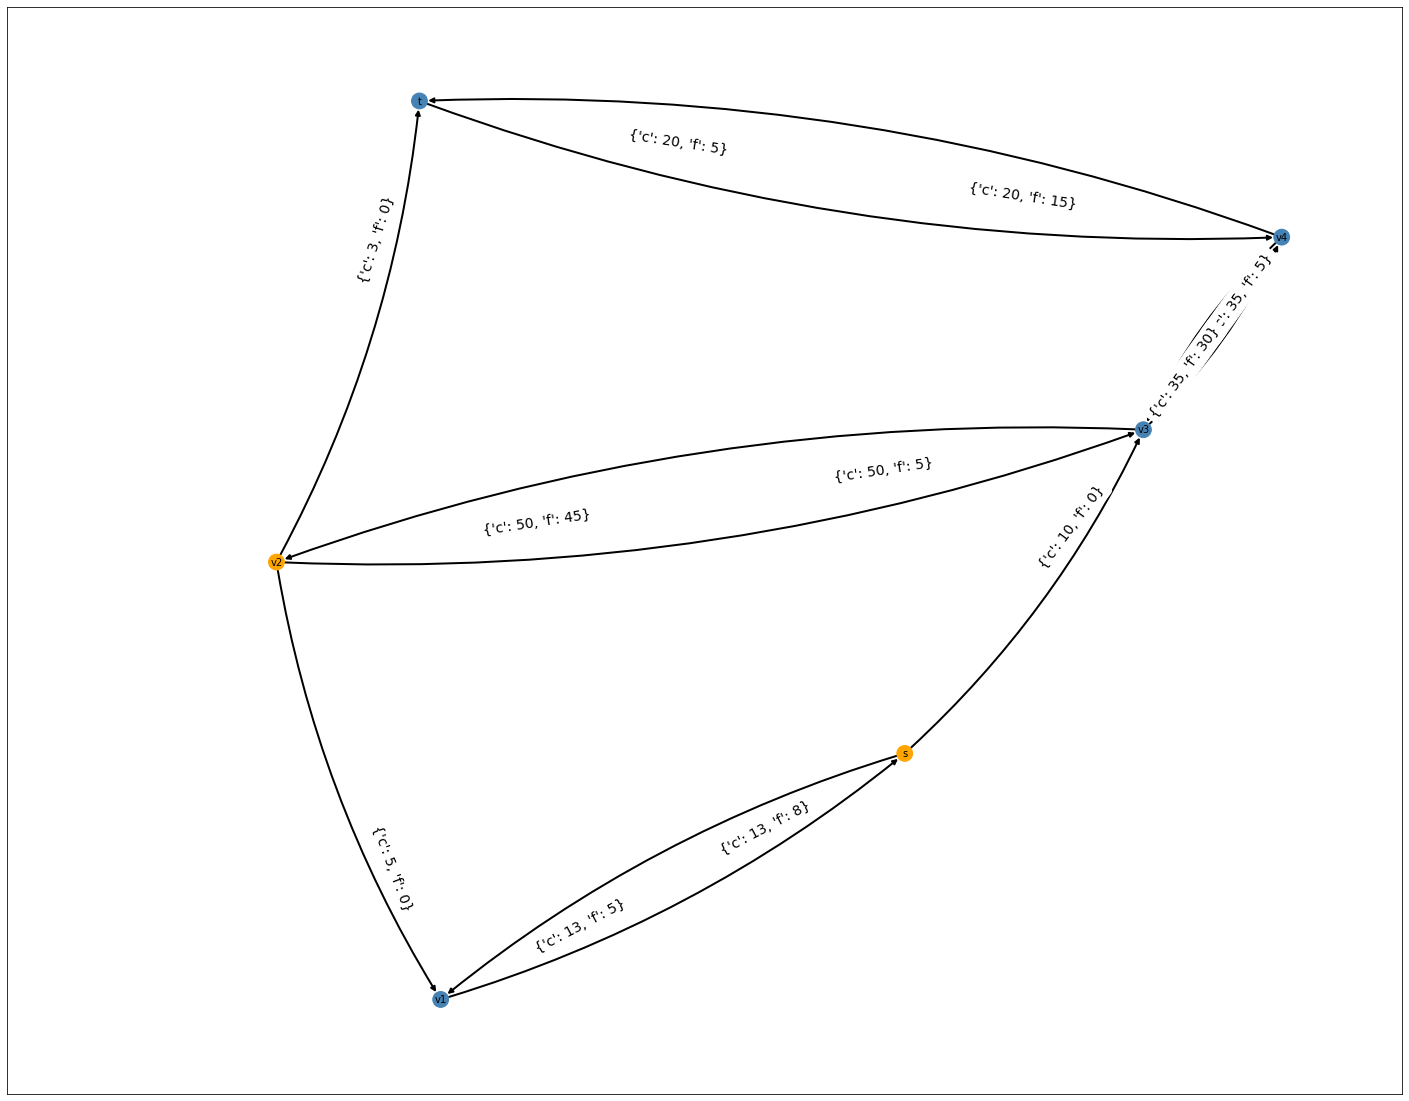

<Figure size 1500x1200 with 0 Axes>


caminho de aumento: ['s', 'v3', 'v4', 't']


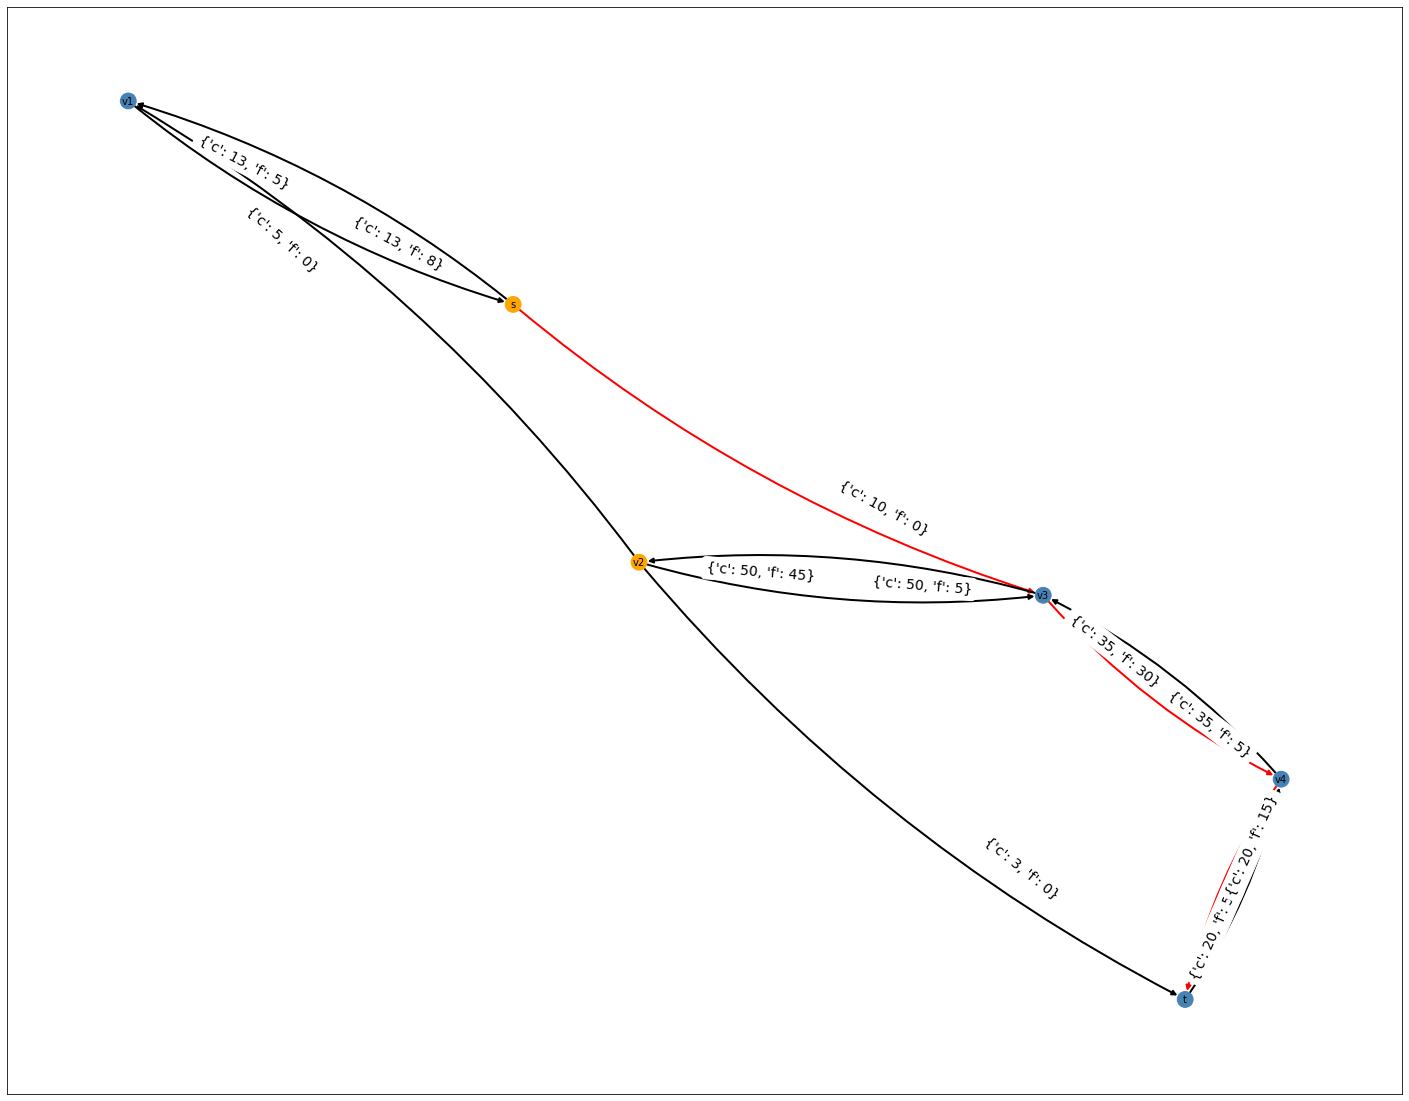

<Figure size 1500x1200 with 0 Axes>

	delta: 10




3a iteracao
Grafo residual


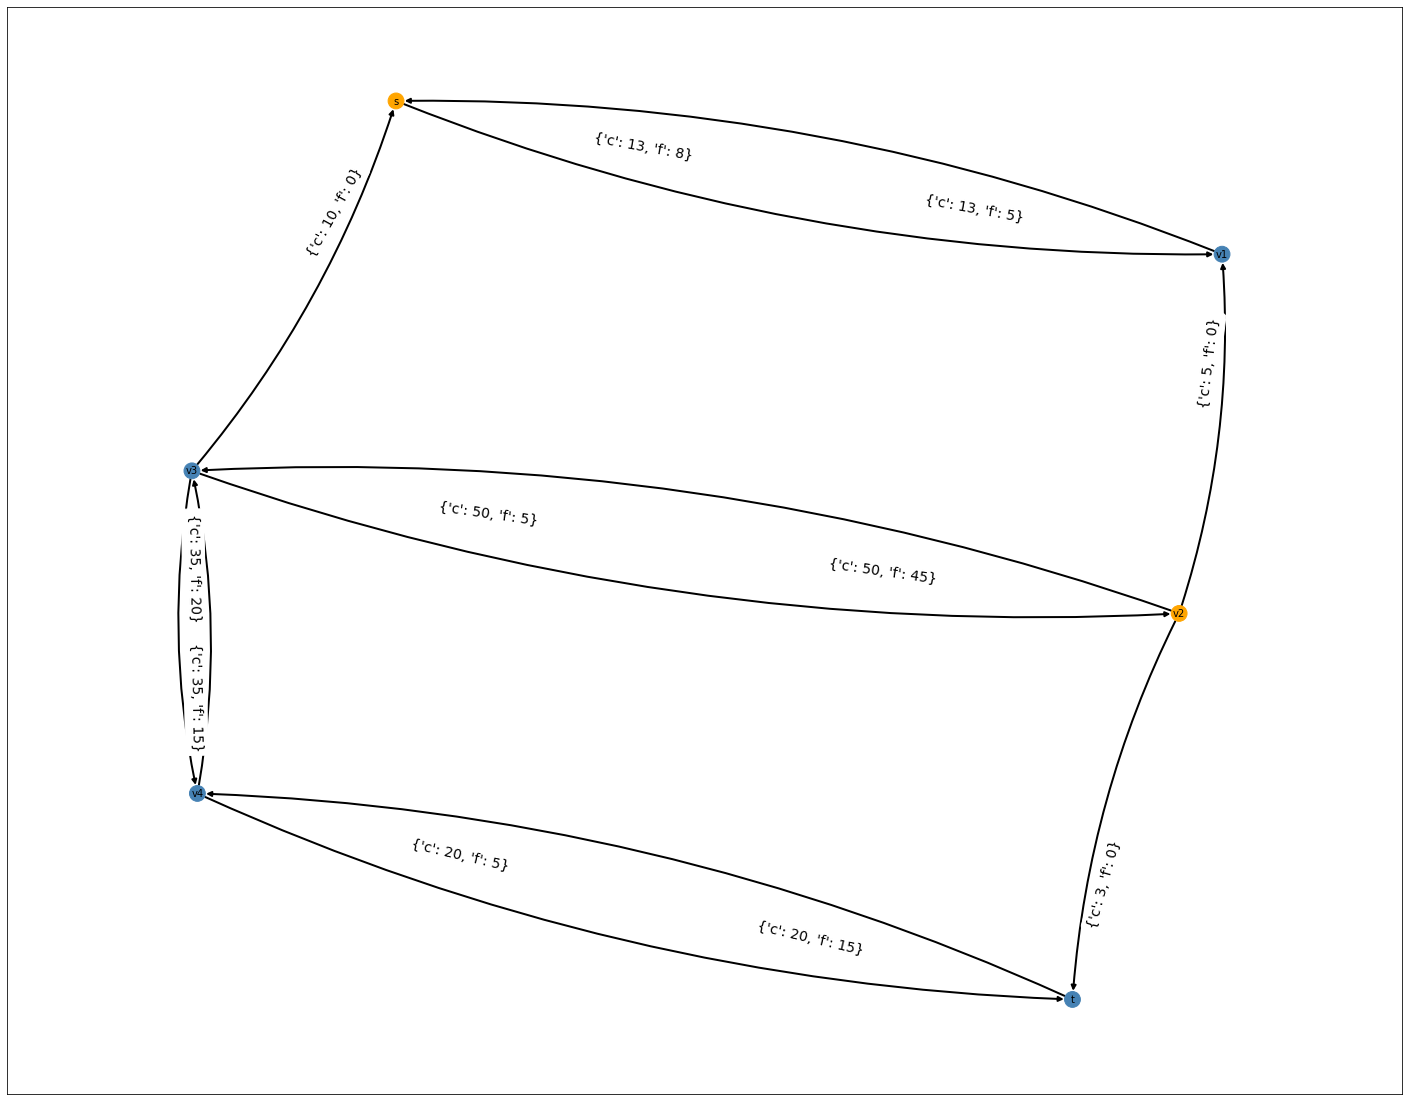

<Figure size 1500x1200 with 0 Axes>

fluxo maximo = 15
corte minimo ={['s', 'v1']}


In [366]:
G = nx.DiGraph()

G.add_edge('s', 'v1', c=13)
G.add_edge('s', 'v3', c=10)
G.add_edge('v1', 'v2', c=5)
G.add_edge('v2', 'v3', c=50)
G.add_edge('v2', 't', c=3)
G.add_edge('v3', 'v4', c=35)
G.add_edge('v4', 't', c=20)

plot_graph(G, 's', 't', None)
print("\n")

x, t = ford_fulkerson_algo(G, 's', 't')
print("fluxo maximo =", x)
print("corte minimo ={", t, "}", sep="")

---

## Aplicação Real
Paper: *An Approach Based on Ford-Fulkerson Algorithm to Optimize Network Bandwidth Usage - Euclides Pinto Neto, Gustavo Callou*  
Published in: 2015 Brazilian Symposium on Computing Systems Engineering (SBESC)  
  
### Problema
Controle de fluxo em cenários reais de rede de computadores. Algorimo de roteamento RIP (Routing Information Protocol) não possui grande eficiência em cenários com grande variedade de largura de banda.

### Casos de estudo
![](./figure_paper_figure3.png)
![](./figure_paper_figure4.png)  

**Results.** Figure 3 shows the bandwidth of links and Figure 4 shows how much flow the network can support. Note that although some links have capacity greater than its flow, it cannot be increased to respect the limitations of the network. For example, links have bandwidth 100Mb/s and bandwidth usage 10Mb/s even applying the maximum flow.  

![](./figure_paper_figure5.png)
![](./figure_paper_figure6.png)  
**Results.** Figure 5 depicts each link capacity and Figure 6 shows its maximum flow (bandwidth usage). it is possible to note that some links have bandwidth 1024Mb/s and bandwidth usage 0Mb/s even considering the maximum flow of the network.
  
  
### Conclusão
O método proposto neste trabalho diminui o uso de banda na rede, se comparado ao método RIP (Routing Information Protocol).  
![](./figure_paper_figure7.png)  



---

## Referências
**[1]** - https://networkx.org/documentation/stable/index.html  
**[2]** - https://matplotlib.org/stable/contents.html#  
**[3]** - https://ieeexplore.ieee.org/abstract/document/7423216?casa_token=-Yu6SSy2ZokAAAAA:vjXrOgUmy0SQ28Ahva7QzE_Fd-QrIz6Zz1EL3IkicoWn7Se1RllWRd8LcAdr30cYdteX3jZ2UI1W2w